# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
#In the context of CRISP-DM, the business understanding phase involves translating the business problem into a data problem.
#In this case, the business goal is to identify the key factors influencing used car prices for a used car dealership. 
#The data problem can be defined as developing a predictive model that analyzes the dataset of 426K used cars, 
#aiming to understand and quantify the relationships between various features (such as car make, model, year, mileage,
#and other relevant attributes) and the corresponding prices of the cars. 

#The technical vocabulary includes terms like feature engineering, regression analysis, and predictive modeling to extract
#insights into the factors that contribute to the pricing of used cars, 
#ultimately providing valuable recommendations to the dealership.

In [2]:
#The data task at hand involves leveraging the CRISP-DM framework to address a business problem related to used car prices 
#for a dealership. Specifically, the objective is to conduct data analysis on a dataset containing information about 426K 
#used cars. 

#The data tasks include preprocessing and feature engineering to extract relevant features such as car make, 
#model, year, and mileage. Subsequently, employing regression analysis and predictive modeling techniques to establish 
#relationships between these features and the prices of used cars. The ultimate goal is to derive insights that enable 
#the formulation of data-driven recommendations for the dealership, aiding in understanding the key drivers 
#influencing the pricing of used cars in the market.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('data/vehicles.csv')

In [5]:
# Check the cleaned dataset
data.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [6]:
data.head(30)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [7]:
# Noted the the first 26 raws are mostly NaN values. We can drop later.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [9]:
# Convert column types using convert_dtypes()
data = data.convert_dtypes()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426880 non-null  Int64 
 1   region        426880 non-null  string
 2   price         426880 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426880 non-null  string
dtypes: Int64(4), string(14)


In [11]:
# Data describe
data.describe(include = 'string')

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [12]:
# Perecentage of NaN values for each feature
for column in data.columns:
    print(f'Percent of missing {column} records is %.2f%%' %((data[column].isnull().sum()/data.shape[0])*100))

Percent of missing id records is 0.00%
Percent of missing region records is 0.00%
Percent of missing price records is 0.00%
Percent of missing year records is 0.28%
Percent of missing manufacturer records is 4.13%
Percent of missing model records is 1.24%
Percent of missing condition records is 40.79%
Percent of missing cylinders records is 41.62%
Percent of missing fuel records is 0.71%
Percent of missing odometer records is 1.03%
Percent of missing title_status records is 1.93%
Percent of missing transmission records is 0.60%
Percent of missing VIN records is 37.73%
Percent of missing drive records is 30.59%
Percent of missing size records is 71.77%
Percent of missing type records is 21.75%
Percent of missing paint_color records is 30.50%
Percent of missing state records is 0.00%


In [13]:
# All columns (Features)
print(data.columns)

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


In [14]:
# numerical columns
numerical_columns = ['id', 'price', 'year', 'odometer']

In [15]:
# categorical columns
categorical_columns = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']

In [16]:
# Check unique values and their counts for categorical columns
for column in data.columns:
    unique_values_count = data[column].value_counts()
    print(f"\nUnique values count for {column}:")
    print(unique_values_count)


Unique values count for id:
id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: count, Length: 426880, dtype: Int64

Unique values count for region:
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: Int64

Unique values count for price:
price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: Int64

Unique values count for year:
year
2017    36420
2018    36369
2015    315

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [17]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [18]:
# #Noted the the first 26 raws are mostly NaN values. We can drop later.
# Drop the first 27 rows
data = data.iloc[27:]

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)

data.head(100)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,3GTP1VEC4EG551563,<NA>,<NA>,pickup,white,al
1,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,1GCSCSE06AZ123805,<NA>,<NA>,pickup,blue,al
2,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,3GCPWCED5LG130317,<NA>,<NA>,pickup,red,al
3,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,5TFRM5F17HX120972,<NA>,<NA>,pickup,red,al
4,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,<NA>,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7306198330,auburn,6800,2005,<NA>,blue bird bus,excellent,6 cylinders,diesel,180000,clean,automatic,<NA>,rwd,full-size,bus,yellow,al
96,7306178510,auburn,36590,2019,volvo,s60 t6 r-design sedan 4d,good,<NA>,gas,7618,clean,other,7JRA22TM2KG013336,<NA>,<NA>,sedan,white,al
97,7306147932,auburn,35990,2019,volvo,s60 t6 r-design sedan 4d,good,<NA>,other,15567,clean,other,7JRA22TM4KG006873,<NA>,<NA>,sedan,red,al
98,7306095627,auburn,33590,2019,volvo,s60 t6 r-design sedan 4d,good,<NA>,gas,10742,clean,other,7JRA22TM6KG005594,<NA>,<NA>,sedan,silver,al


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426853 entries, 0 to 426852
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426853 non-null  Int64 
 1   region        426853 non-null  string
 2   price         426853 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426853 non-null  string
dtypes: Int64(4), string(14)


In [20]:
# Convert column types using convert_dtypes()
data = data.convert_dtypes()

# Print DataFrame information to verify types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426853 entries, 0 to 426852
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426853 non-null  Int64 
 1   region        426853 non-null  string
 2   price         426853 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426853 non-null  string
dtypes: Int64(4), string(14)


In [21]:
# Drop unnecessary columns like 'id' and 'VIN' if they are not needed for modeling
data = data.drop(['id', 'VIN'], axis=1)
data.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
426848,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226,clean,other,fwd,<NA>,sedan,<NA>,wy
426849,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,<NA>,gas,12029,clean,other,fwd,<NA>,sedan,red,wy
426850,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,<NA>,diesel,4174,clean,other,<NA>,<NA>,hatchback,white,wy
426851,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112,clean,other,fwd,<NA>,sedan,silver,wy
426852,wyoming,30590,2019,bmw,4 series 430i gran coupe,good,<NA>,gas,22716,clean,other,rwd,<NA>,coupe,<NA>,wy


In [22]:
# Calculate the number of NaN values in each row
nan_count_per_row = data.isnull().sum(axis=1)

# Set a threshold for the number of NaN values
threshold = 10  # Adjust this threshold as needed

# Find rows where the number of NaN values exceeds the threshold
rows_with_most_nan = data[nan_count_per_row > threshold]

# Print the rows with most NaN values
print("Rows with most NaN values:")
print(rows_with_most_nan)

# Now, drop the rows with the most NaN values
data = data.drop(index=rows_with_most_nan.index)

# Print the cleaned dataframe
print("Cleaned dataframe:")
data.head()

Rows with most NaN values:
                       region  price  year manufacturer model condition  \
30157           inland empire   4200  <NA>         <NA>  <NA>      <NA>   
33921             los angeles   4900  <NA>         <NA>  <NA>      <NA>   
63209             SF bay area   3400  <NA>         <NA>  <NA>      <NA>   
70010          visalia-tulare   2900  <NA>         <NA>  <NA>      <NA>   
72451                 boulder   5000  <NA>         <NA>  <NA>      <NA>   
...                       ...    ...   ...          ...   ...       ...   
368770    dallas / fort worth   7900  <NA>         <NA>  <NA>      <NA>   
372569                el paso      0  <NA>         <NA>  <NA>      <NA>   
375859                houston   7995  <NA>         <NA>  <NA>      <NA>   
402247             bellingham  25956  <NA>         <NA>  <NA>      <NA>   
410592  skagit / island / SJI    750  <NA>         <NA>  <NA>      <NA>   

       cylinders  fuel  odometer title_status transmission drive  size  

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,<NA>,<NA>,pickup,white,al
1,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,<NA>,<NA>,pickup,blue,al
2,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,<NA>,<NA>,pickup,red,al
3,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,<NA>,<NA>,pickup,red,al
4,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,full-size,truck,black,al


In [23]:
# Let's check again the NaN values per columns

# Perecentage of NaN values for each feature
for column in data.columns:
    print(f'Percent of missing {column} records is %.2f%%' %((data[column].isnull().sum()/data.shape[0])*100))

Percent of missing region records is 0.00%
Percent of missing price records is 0.00%
Percent of missing year records is 0.27%
Percent of missing manufacturer records is 4.11%
Percent of missing model records is 1.22%
Percent of missing condition records is 40.77%
Percent of missing cylinders records is 41.61%
Percent of missing fuel records is 0.68%
Percent of missing odometer records is 1.01%
Percent of missing title_status records is 1.91%
Percent of missing transmission records is 0.58%
Percent of missing drive records is 30.57%
Percent of missing size records is 71.76%
Percent of missing type records is 21.74%
Percent of missing paint_color records is 30.49%
Percent of missing state records is 0.00%


In [24]:
# Since Percent of missing year records is 0.01% we can drop this tiny percentage
# Drop rows where the 'year' column contains NaN values
data = data.dropna(subset=['year'])

# Print the cleaned dataframe
print("Cleaned dataframe after dropping rows with NaN in 'year' column:")
data.head()

Cleaned dataframe after dropping rows with NaN in 'year' column:


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,<NA>,<NA>,pickup,white,al
1,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,<NA>,<NA>,pickup,blue,al
2,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,<NA>,<NA>,pickup,red,al
3,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,<NA>,<NA>,pickup,red,al
4,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,full-size,truck,black,al


In [25]:
# The high percentages features with NAN values are:


# Percent of missing 'type' records is 21.74%
# Percent of missing 'drive' records is 30.57%
# Percent of missing 'paint_color' records is 30.49%

# Percent of missing 'condition' records is 40.77%
# Percent of missing 'cylinders' records is 41.61%

# Percent of missing 'size' records is 71.76%

# Below code replaces missing values in the specified columns ('drive', 'type', and 'paint_color') with the mode (most frequent value) of each 
# respective column. This is a common method of imputation, especially for categorical variables, 
# where using the mode can be a reasonable approach to fill missing values.

# Calculate the mode (most frequently occurring value) 
# for the 'drive', 'type', and 'paint_color' columns in the DataFrame data.

type_mode = data['type'].mode()[0]
drive_mode = data['drive'].mode()[0]
paint_color_mode = data['paint_color'].mode()[0]

# Impute missing values for 'drive', 'type', and 'paint_color' with their modes

data['drive'].fillna(drive_mode, inplace=True)
data['type'].fillna(type_mode, inplace=True)
data['paint_color'].fillna(paint_color_mode, inplace=True)


# Categorize missing values in 'condition', 'size' and 'cylinders' as a separate category
data['condition'].fillna('Unknown', inplace=True)
data['cylinders'].fillna('Unknown', inplace=True)
data['size'].fillna('Unknown', inplace=True)

# Print DataFrame information to verify no missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 425651 entries, 0 to 426852
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        425651 non-null  string
 1   price         425651 non-null  Int64 
 2   year          425651 non-null  Int64 
 3   manufacturer  409228 non-null  string
 4   model         420442 non-null  string
 5   condition     425651 non-null  string
 6   cylinders     425651 non-null  string
 7   fuel          422930 non-null  string
 8   odometer      421344 non-null  Int64 
 9   title_status  417745 non-null  string
 10  transmission  423187 non-null  string
 11  drive         425651 non-null  string
 12  size          425651 non-null  string
 13  type          425651 non-null  string
 14  paint_color   425651 non-null  string
 15  state         425651 non-null  string
dtypes: Int64(3), string(13)
memory usage: 56.4 MB
None


In [26]:
# Validate the percentage of NaN values for each feature
for column in data.columns:
    print(f'Percent of missing {column} records is %.2f%%' %((data[column].isnull().sum()/data.shape[0])*100))

Percent of missing region records is 0.00%
Percent of missing price records is 0.00%
Percent of missing year records is 0.00%
Percent of missing manufacturer records is 3.86%
Percent of missing model records is 1.22%
Percent of missing condition records is 0.00%
Percent of missing cylinders records is 0.00%
Percent of missing fuel records is 0.64%
Percent of missing odometer records is 1.01%
Percent of missing title_status records is 1.86%
Percent of missing transmission records is 0.58%
Percent of missing drive records is 0.00%
Percent of missing size records is 0.00%
Percent of missing type records is 0.00%
Percent of missing paint_color records is 0.00%
Percent of missing state records is 0.00%


In [27]:
# Handle inconsistencies or errors in data entries (if applicable)
# Example: Convert inconsistent manufacturer names to a standardized format
# Mapping dictionary for standardizing manufacturer names

manufacturer_mapping = {
    'ford': 'Ford',
    'chevrolet': 'Chevrolet',
    'toyota': 'Toyota',
    'honda': 'Honda',
    'nissan': 'Nissan',
    'jeep': 'Jeep',
    'ram': 'Ram',
    'gmc': 'GMC',
    'bmw': 'BMW',
    'dodge': 'Dodge',
    'mercedes-benz': 'Mercedes-Benz',
    'hyundai': 'Hyundai',
    'subaru': 'Subaru',
    'volkswagen': 'Volkswagen',
    'kia': 'Kia',
    'lexus': 'Lexus',
    'audi': 'Audi',
    'cadillac': 'Cadillac',
    'chrysler': 'Chrysler',
    'acura': 'Acura',
    'buick': 'Buick',
    'mazda': 'Mazda',
    'infiniti': 'Infiniti',
    'lincoln': 'Lincoln',
    'volvo': 'Volvo',
    'mitsubishi': 'Mitsubishi',
    'mini': 'MINI',
    'pontiac': 'Pontiac',
    'rover': 'Land Rover',  # Assuming 'rover' refers to Land Rover
    'jaguar': 'Jaguar',
    'porsche': 'Porsche',
    'mercury': 'Mercury',
    'saturn': 'Saturn',
    'alfa-romeo': 'Alfa Romeo',
    'tesla': 'Tesla',
    'fiat': 'FIAT',
    'harley-davidson': 'Harley-Davidson',
    'ferrari': 'Ferrari',
    'datsun': 'Datsun',
    'aston-martin': 'Aston Martin',
    'land rover': 'Land Rover',  # Assuming 'land rover' refers to Land Rover
    'morgan': 'Morgan',
    'unknown': 'unknown'  # Keep 'unknown' unchanged
}

# Apply the mapping to standardize manufacturer names
data['manufacturer'] = data['manufacturer'].map(manufacturer_mapping).fillna(data['manufacturer'])

# Check the unique values of manufacturer after standardization
print(data['manufacturer'].unique())

['GMC' 'Chevrolet' 'Toyota' 'Ford' 'Jeep' 'Nissan' 'Ram' 'Mazda'
 'Cadillac' 'Honda' 'Dodge' 'Lexus' 'Jaguar' 'Buick' 'Chrysler' 'Volvo'
 'Audi' 'Infiniti' 'Lincoln' 'Alfa Romeo' 'Subaru' <NA> 'Acura' 'Hyundai'
 'Mercedes-Benz' 'BMW' 'Mitsubishi' 'Volkswagen' 'Porsche' 'Kia'
 'Land Rover' 'Ferrari' 'MINI' 'Pontiac' 'FIAT' 'Tesla' 'Saturn' 'Mercury'
 'Harley-Davidson' 'Datsun' 'Aston Martin' 'Morgan']


In [28]:
# check the number of records where the value = 0
data.eq(0).sum()
#  We will  deal with ZERO values for "Price" and "Odometer" columns

region              0
price           32840
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1943
title_status        0
transmission        0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64

In [29]:
#################################################################################################################
#    'Price'  column updates:
#  1- Get rid of outliers
#  2- Deal with ZERO price values
#  
#################################################################################################################

In [30]:
# Handle outliers in 'price' columns

# Calculate the interquartile range (IQR)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

# Remove outliers from the dataset
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]
#print(min(cleaned_data['price']))
data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,33590,2014,GMC,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,4wd,Unknown,pickup,white,al
1,auburn,22590,2010,Chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,4wd,Unknown,pickup,blue,al
2,auburn,39590,2020,Chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,4wd,Unknown,pickup,red,al
3,auburn,30990,2017,Toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,4wd,Unknown,pickup,red,al
4,auburn,15000,2013,Ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,full-size,truck,black,al


In [31]:
# Check the number of records where the price = 0
zero_price_count = (data['price'] == 0).sum()

# Total number of records
total_records = len(data)

# Calculate the percentage of records where the price = 0
zero_price_percentage = (zero_price_count / total_records) * 100

print("Number of records with price = 0:", zero_price_count)
print("Percentage of records with price = 0: {:.2f}%".format(zero_price_percentage))

Number of records with price = 0: 32840
Percentage of records with price = 0: 7.87%


In [32]:
# Goal of the analysis: The goal is to understand what factors make a car more or less expensive, 
#    including rows where the price is zero may not align with your objective. Zero price values might represent
#    missing data or vehicles listed for free, which may not provide meaningful insights into the factors affecting 
#    car prices.
#  Based on the above, we should drop the ZERO prices.

In [33]:
# Find rows where the price is zero
zero_price_rows = data[data['price'] == 0]

# Print the rows where the price is zero
zero_price_rows.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
19,auburn,0,2011,Jeep,compass,excellent,Unknown,gas,99615,clean,automatic,4wd,full-size,SUV,white,al
99,auburn,0,2018,Chevrolet,express cargo van,like new,6 cylinders,gas,68472,clean,automatic,rwd,full-size,van,white,al
100,auburn,0,2019,Chevrolet,express cargo van,like new,6 cylinders,gas,69125,clean,automatic,rwd,full-size,van,white,al
101,auburn,0,2018,Chevrolet,express cargo van,like new,6 cylinders,gas,66555,clean,automatic,rwd,full-size,van,white,al
164,birmingham,0,2015,Nissan,sentra,excellent,4 cylinders,gas,99505,clean,automatic,fwd,Unknown,sedan,silver,al


In [34]:
# Dealing with cars listed at a price of zero can be approached in a few different ways, 
# depending on the context and your specific goals:
# Exclude from analysis: If you're performing analysis where accurate pricing information is crucial, 
# you might choose to exclude listings with zero prices from your analysis altogether. This ensures that these listings
# don't skew your results or introduce inaccuracies.
# 1. Drop price = 0
data = data[data['price'] != 0]

In [35]:
# Verify  again the number of records where the value = 0
data.eq(0).sum()

region             0
price              0
year               0
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer        1078
title_status       0
transmission       0
drive              0
size               0
type               0
paint_color        0
state              0
dtype: int64

In [36]:
#####################  END of Price Analysis

In [37]:
#################################################################################################################
#    Update of the odometer column
#  1- Get rid of outliers
#  2- Deal with ZERO Odometer values
#################################################################################################################

In [38]:
# Assuming you have a DataFrame 'data' with a column 'odometers'
# Calculate Q1 (25th percentile)
Q1 = data['odometer'].quantile(0.25)

# Calculate Q3 (75th percentile)
Q3 = data['odometer'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['odometer'] < lower_bound) | (data['odometer'] > upper_bound)]

print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print("Outliers:")
print(outliers)


# Remove outliers from the dataset
data = data[(data['odometer'] >= lower_bound) & (data['odometer'] <= upper_bound)]
data.head()

Lower bound for outliers: -105724.5
Upper bound for outliers: 282231.5
Outliers:
            region  price  year manufacturer                model condition  \
428     birmingham  22500  1929         Ford                 <NA>   Unknown   
457     birmingham  11500  2008         Ford  f-250 super duty xl      good   
500     birmingham   5500  2001         Ford             e350 van      fair   
535     birmingham  27990  2014          Ram             2500 4x4  like new   
589     birmingham  17990  2018         Ford             edge sel  like new   
...            ...    ...   ...          ...                  ...       ...   
426481     wyoming   4995  2002         Ford                 e450   Unknown   
426563     wyoming  14500  2005          Ram                 <NA>   Unknown   
426616     wyoming   4200  2001       Toyota              sequoia      fair   
426644     wyoming   9900  2005    Chevrolet              2500 ls   Unknown   
426663     wyoming   6500  2002         Ford      

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,33590,2014,GMC,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,4wd,Unknown,pickup,white,al
1,auburn,22590,2010,Chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,4wd,Unknown,pickup,blue,al
2,auburn,39590,2020,Chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,4wd,Unknown,pickup,red,al
3,auburn,30990,2017,Toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,4wd,Unknown,pickup,red,al
4,auburn,15000,2013,Ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,full-size,truck,black,al


In [39]:
# Check the number of records where the odometer = 0
zero_odometer_count = (data['odometer'] == 0).sum()

# Total number of records
total_records = len(data)

# Calculate the percentage of records where the price = 0
zero_odometer_percentage = (zero_odometer_count / total_records) * 100

print("Number of records with odometer = 0:", zero_odometer_count)
print("Percentage of records with ododmeter = 0: {:.2f}%".format(zero_odometer_percentage))

Number of records with odometer = 0: 1078
Percentage of records with ododmeter = 0: 0.28%


In [40]:
# Find rows where the odometer  is zero
#zero_odometer_rows = data[data['odometer'] == 0]

# Print the rows where the odometer is zero
#zero_odometer_rows.head()

In [41]:
#When our goal is to understand what factors make a car more or less expensive, zero odometer readings can be problematic 
#because they don't provide meaningful information about the vehicle's mileage. Here are some considerations on how to 
#handle zero odometer readings in the context of your analysis:

#Exclude Zero Odometer Readings: Since zero odometer readings are likely to be errors or missing data,
#you may choose to exclude these records from your analysis. This ensures that you're focusing on vehicles with meaningful
#odometer readings that contribute to your understanding of how mileage affects car prices.

#Impute Zero Odometer Readings: If you believe that zero odometer readings are due to missing data rather than errors,
# you might consider imputing these values with estimates based on the characteristics of other vehicles in your dataset. 
#For example, you could impute zero odometer readings with the mean or median mileage of similar vehicles (e.g., vehicles of the same make, model, year, etc.).

#Sensitivity Analysis: Conduct a sensitivity analysis to assess how different approaches to handling zero odometer 
#readings impact your analysis results. This involves performing your analysis using different methods of handling zero odometer readings (e.g., excluding them, imputing them with different estimates) and
#comparing the results to evaluate the robustness of your findings.

#Document Assumptions and Methods: Regardless of the approach you choose, it's important to document the assumptions 
#and methods used to handle zero odometer readings. This documentation ensures transparency and allows others 
#to understand and replicate your analysis.

#Consider Other Variables: In addition to odometer readings, consider including other variables related 
# to vehicle condition, such as service history, accident records, and overall maintenance, in your analysis. These variables can provide additional insights into what factors make a car more or less expensive beyond just mileage.

In [42]:
#  Remove rows with zero odometer values: If zero values are rare and you can't impute them accurately, 
# you might choose to remove these rows from your dataset.
#data = data[data['odometer'] != 0]

In [43]:
# END of "ODOMETER"

In [44]:
 # Explore Categorical Variables: For categorical variables, you can use value counts to see the distribution of categories.
# This can help identify popular manufacturers, models, conditions, etc.

In [45]:
#  Manufacturer: Determine the most popular manufacturers.
manufacturer_counts = data['manufacturer'].value_counts()
print(manufacturer_counts)

manufacturer
Ford               61537
Chevrolet          48222
Toyota             30810
Honda              19579
Nissan             17231
Jeep               17145
Ram                15211
GMC                14261
BMW                13518
Dodge              12059
Mercedes-Benz       9892
Hyundai             9304
Subaru              8927
Volkswagen          8800
Lexus               7642
Kia                 7521
Audi                6913
Cadillac            6377
Acura               5652
Chrysler            5584
Buick               5129
Mazda               5000
Infiniti            4455
Lincoln             3939
Volvo               3117
Mitsubishi          3094
MINI                2253
Pontiac             2200
Jaguar              1885
Land Rover          1854
Porsche             1151
Mercury             1128
Saturn              1067
Alfa Romeo           842
FIAT                 769
Tesla                752
Harley-Davidson      138
Datsun                63
Aston Martin          11
Ferrari     

In [46]:
#Model: Find out which models are most frequently listed.
model_counts = data['model'].value_counts()
print(model_counts)

model
f-150                                                6869
silverado 1500                                       4403
1500                                                 3726
camry                                                2777
accord                                               2685
                                                     ... 
suburban 1500 4wd                                       1
e-series van e-250 class b conversion camper r...       1
silverado 1500 rst automatic                            1
outback ** 5 speed manual** super clean!!               1
Paige Glenbrook Touring                                 1
Name: count, Length: 26561, dtype: Int64


In [47]:
#Condition: Understand the distribution of vehicle conditions.
condition_counts = data['condition'].value_counts()
print(condition_counts)

condition
Unknown      142781
good         116908
excellent     91716
like new      19305
fair           6250
new             978
salvage         552
Name: count, dtype: Int64


In [48]:
#Fuel Type: Explore the types of fuel used by vehicles.
fuel_counts = data['fuel'].value_counts()
print(fuel_counts)

fuel
gas         322090
other        26924
diesel       21036
hybrid        4811
electric      1541
Name: count, dtype: Int64


In [49]:
# Title Status: Determine the distribution of title statuses.
title_status_counts = data['title_status'].value_counts()
print(title_status_counts)


title_status
clean         358531
rebuilt         6970
salvage         3733
lien            1340
missing          723
parts only       169
Name: count, dtype: Int64


In [50]:
# Transmission: Explore the types of transmissions.
transmission_counts = data['transmission'].value_counts()
print(transmission_counts)

transmission
automatic    293791
other         61050
manual        22212
Name: count, dtype: Int64


In [51]:
#Drive Type: Understand the distribution of drive types.
drive_counts = data['drive'].value_counts()
print(drive_counts)

drive
4wd    229542
fwd     96063
rwd     52885
Name: count, dtype: Int64


In [52]:
# Vehicle Type: Explore the types of vehicles listed.
type_counts = data['type'].value_counts()
print(type_counts)

type
sedan          160982
SUV             68617
pickup          38692
truck           27813
other           18989
coupe           17395
hatchback       15819
wagon            9957
van              7630
convertible      7061
mini-van         4482
offroad           572
bus               481
Name: count, dtype: Int64


In [53]:
# Paint Color: Determine the distribution of paint colors.

paint_color_counts = data['paint_color'].value_counts()
print(paint_color_counts)

paint_color
white     181155
black      56162
silver     39144
blue       28629
red        27806
grey       22061
green       6855
custom      6248
brown       6059
yellow      1942
orange      1794
purple       635
Name: count, dtype: Int64


In [54]:
#State: Find out which states have the highest number of vehicle listings.
state_counts = data['state'].value_counts()
print(state_counts)

state
ca    42918
fl    26224
tx    20358
ny    17511
oh    16352
mi    16118
or    13335
pa    12567
nc    12227
wa    11196
wi    10988
tn    10234
co     9943
il     9576
nj     9154
va     8534
ma     7796
id     7777
az     7709
ia     7601
mn     7141
ga     6125
ks     5763
mt     5664
sc     5490
ok     5376
in     5352
ct     4985
al     4549
md     4259
ky     4003
mo     3793
nm     3586
ak     3319
ar     3124
nh     2883
nv     2858
me     2710
la     2655
dc     2616
hi     2606
vt     2426
ri     2241
sd     1182
ut     1020
wv      976
ne      951
ms      931
de      872
wy      545
nd      371
Name: count, dtype: Int64


In [55]:
#size: Find out which size have the highest number of vehicle listings.
size_counts = data['size'].value_counts()
print(size_counts)

size
Unknown        270865
full-size       56240
mid-size        31423
compact         17177
sub-compact      2785
Name: count, dtype: Int64


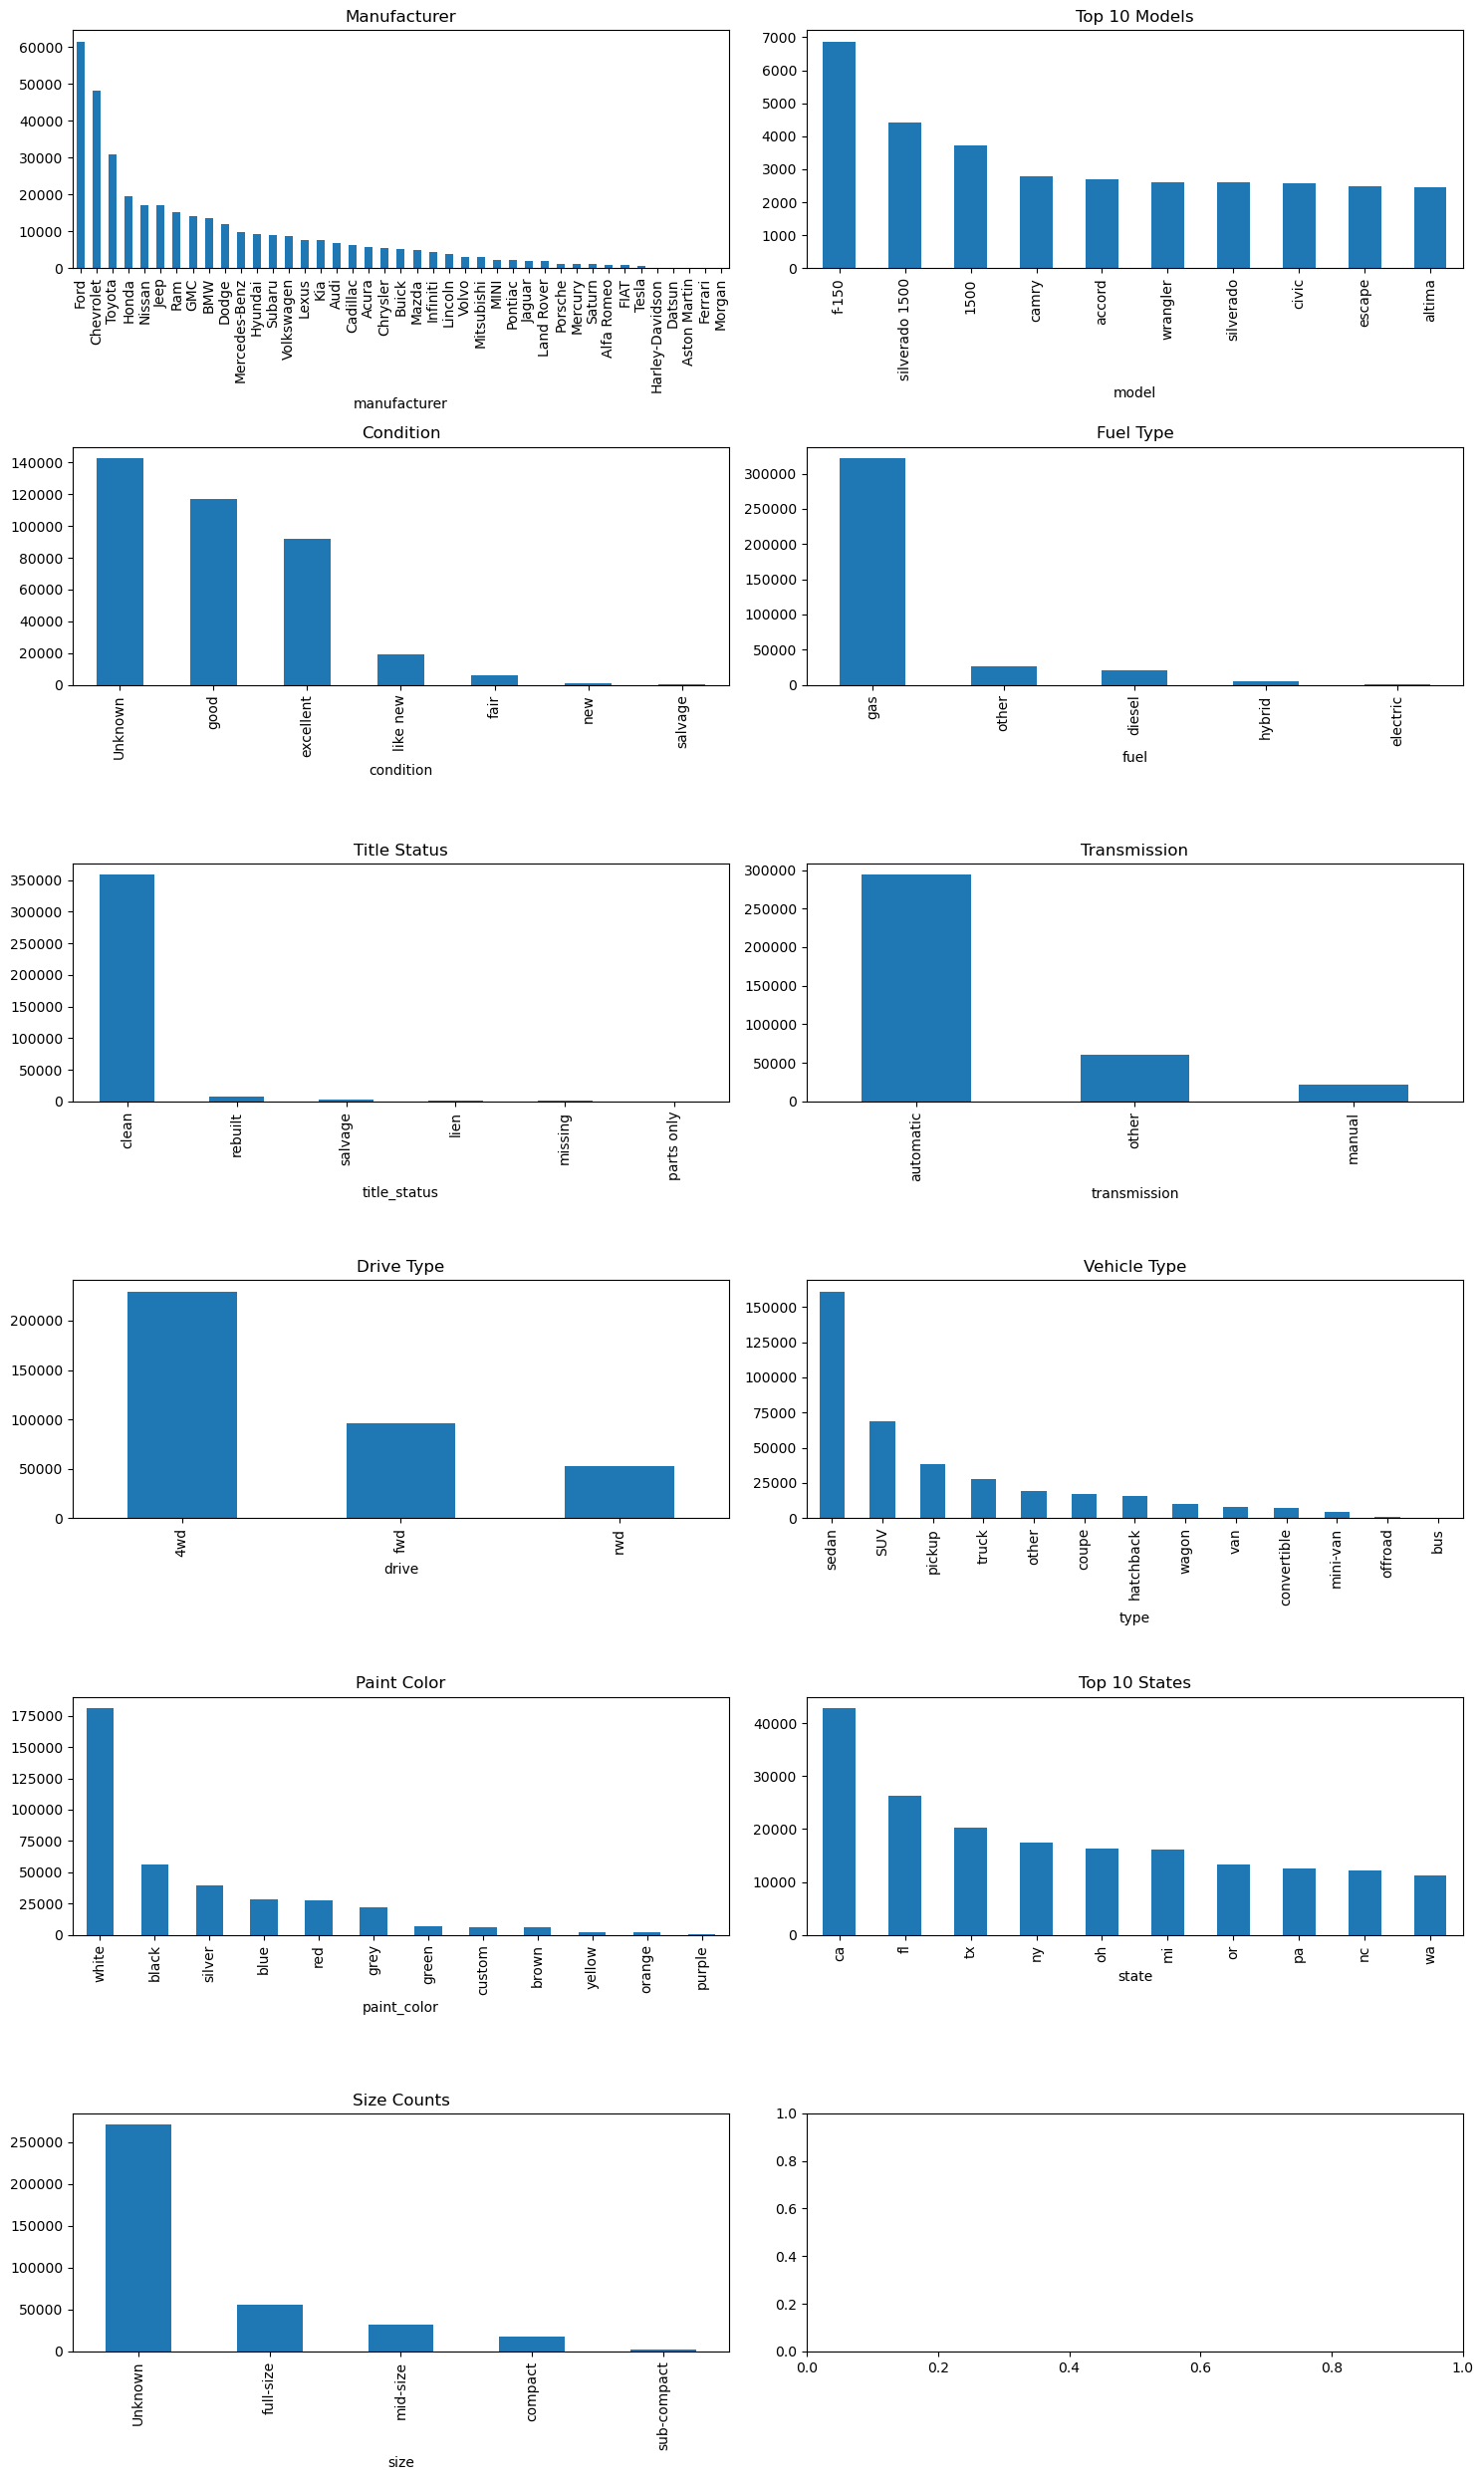

In [56]:
import matplotlib.pyplot as plt

# Set up subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 25))

# Manufacturer
manufacturer_counts.plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Manufacturer')

# Model
model_counts.head(10).plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Top 10 Models')

# Condition
condition_counts.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Condition')

# Fuel Type
fuel_counts.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Fuel Type')

# Title Status
title_status_counts.plot(kind='bar', ax=axs[2, 0])
axs[2, 0].set_title('Title Status')

# Transmission
transmission_counts.plot(kind='bar', ax=axs[2, 1])
axs[2, 1].set_title('Transmission')

# Drive Type
drive_counts.plot(kind='bar', ax=axs[3, 0])
axs[3, 0].set_title('Drive Type')

# Vehicle Type
type_counts.plot(kind='bar', ax=axs[3, 1])
axs[3, 1].set_title('Vehicle Type')

# Paint Color
paint_color_counts.plot(kind='bar', ax=axs[4, 0])
axs[4, 0].set_title('Paint Color')

# State
state_counts.head(10).plot(kind='bar', ax=axs[4, 1])
axs[4, 1].set_title('Top 10 States')

# Size
size_counts.plot(kind='bar', ax=axs[5, 0])
axs[5, 0].set_title('Size Counts')

# Adjust layout
plt.tight_layout()
plt.show()

In [57]:
#   Identifying Patterns and Relationships: Look for any patterns or relationships between variables. 
#    For example, are certain manufacturers more common in certain regions? Is there a correlation between vehicle 
#    condition and price?


In [58]:
#1. Manufacturers in Different Regions:
#  We'll analyze whether certain manufacturers are more common in certain regions.

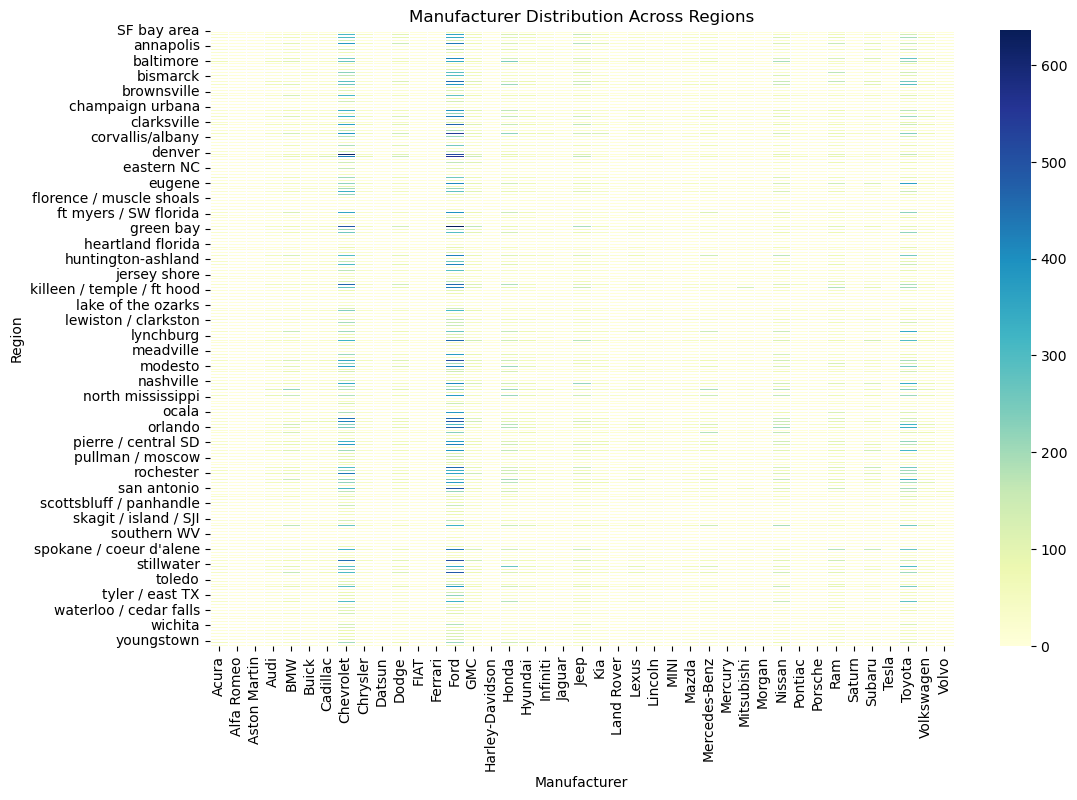

In [59]:
# Assuming 'region' is a column in the dataset

# Grouping data by region and manufacturer, and counting the occurrences
manufacturer_by_region = data.groupby(['region', 'manufacturer']).size().unstack(fill_value=0)

# Plotting heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(manufacturer_by_region, cmap='YlGnBu', linewidths=0.5)
plt.title('Manufacturer Distribution Across Regions')
plt.xlabel('Manufacturer')
plt.ylabel('Region')
plt.show()


In [60]:
#This heatmap will show the distribution of manufacturers across different regions. Darker shades indicate higher counts,
# suggesting a higher prevalence of certain manufacturers in specific regions.


In [61]:
#It seems like Chevrolet, Ford, and Toyota are the most prevalent manufacturers across different regions, 
#as indicated by the darker shades on the heatmap. This suggests that these manufacturers have a strong presence in
#multiple regions compared to others.

#This information could be valuable for various stakeholders. For example, it may indicate that these manufacturers have 
#3effective distribution networks or marketing strategies that allow them to maintain a strong presence in various markets. 
#It could also influence decisions related to dealership locations, advertising campaigns, or inventory management for 
#these manufacturers.

In [62]:
# 2. Correlation between Vehicle Condition and Price:
# We'll investigate if there's a correlation between the condition of a vehicle and its price.

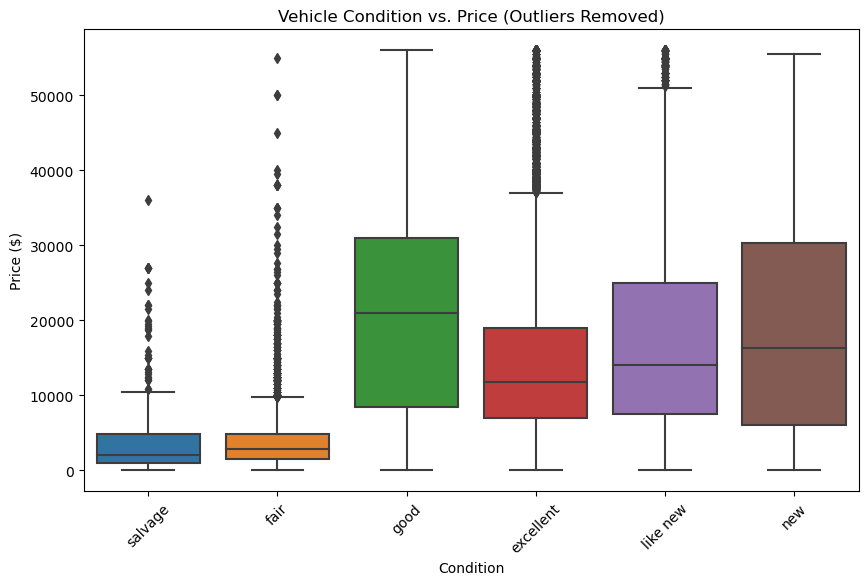

In [63]:
# Create the box plot for the filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=data, order=['salvage', 'fair', 'good', 'excellent', 'like new', 'new'])
plt.title('Vehicle Condition vs. Price (Outliers Removed)')
plt.xlabel('Condition')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()


In [64]:
# highest price for good, new, like new and excellent conditions

In [65]:
#######################################################
#  3- Correlation between odometer and Price:
##########################################################

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378490 entries, 0 to 426852
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        378490 non-null  string
 1   price         378490 non-null  Int64 
 2   year          378490 non-null  Int64 
 3   manufacturer  365044 non-null  object
 4   model         374366 non-null  string
 5   condition     378490 non-null  string
 6   cylinders     378490 non-null  string
 7   fuel          376402 non-null  string
 8   odometer      378490 non-null  Int64 
 9   title_status  371466 non-null  string
 10  transmission  377053 non-null  string
 11  drive         378490 non-null  string
 12  size          378490 non-null  string
 13  type          378490 non-null  string
 14  paint_color   378490 non-null  string
 15  state         378490 non-null  string
dtypes: Int64(3), object(1), string(12)
memory usage: 50.2+ MB


In [67]:

# Now you can perform correlation analysis
correlation = data[['odometer', 'price']].corr()

print("Correlation between odometer and price: \n", correlation)

Correlation between odometer and price: 
           odometer     price
odometer  1.000000 -0.517754
price    -0.517754  1.000000


In [68]:
#A negative correlation implies that there's an inverse relationship between odometer readings and car prices.
#This is a reasonable expectation in the context of used cars: generally, cars with higher mileage tend to have 
# lower prices due to factors such as wear and tear, potential maintenance costs, and decreased perceived value.
#However, it's essential to note that correlation does not imply causation. While higher mileage might contribute 
# to lower prices, there could be other factors influencing car prices as well, such as vehicle age, condition, 
# model popularity, geographical location, etc.

# Overall, the correlation coefficient provides insight into the relationship between odometer readings and car prices
# in our dataset, 
# suggesting a moderate negative correlation between the two variables.

In [69]:
##################################################################################################
# 4. Model and Manufacturer:
# We'll visualize the distribution of models for each manufacturer to identify any patterns.
#########################################################################################################

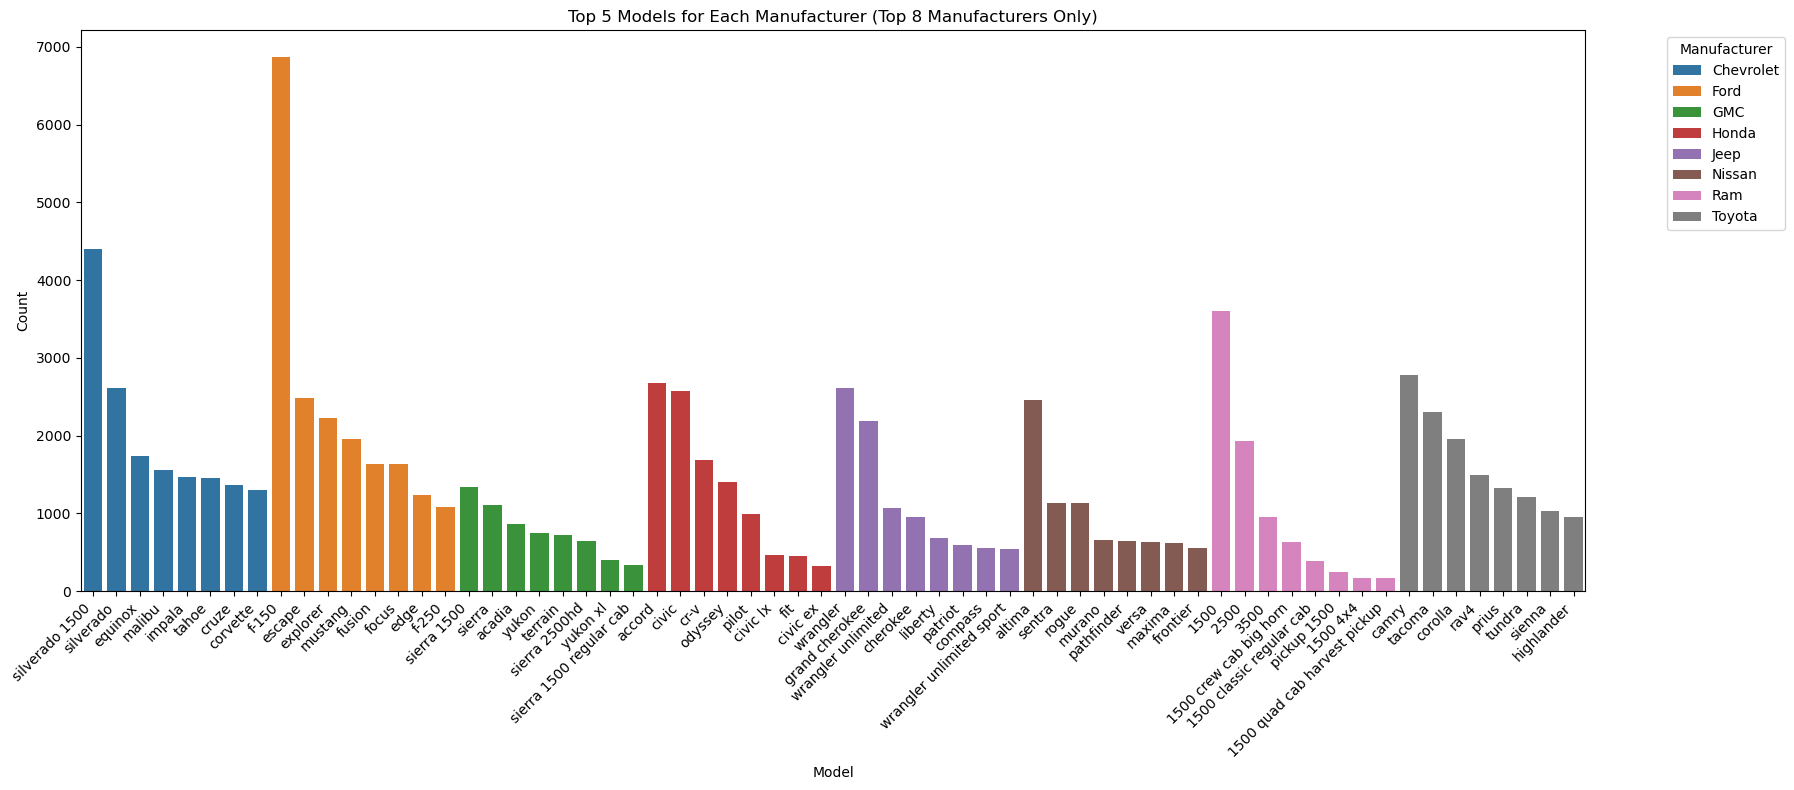

In [171]:
# create a bar plot showing the top models for each manufacturer. 


# Get the top 5 manufacturers
top_manufacturers = data['manufacturer'].value_counts().head(8).index.tolist()

# Filter the dataframe to include only the top 5 manufacturers
df_top5 = data[data['manufacturer'].isin(top_manufacturers)]

# Get the top 5 models for each manufacturer among the top 5 manufacturers
top_models_by_manufacturer = df_top5.groupby('manufacturer')['model'].value_counts().groupby(level=0).head(8)

# Plotting the top models for each manufacturer
plt.figure(figsize=(18, 8))
sns.barplot(x=top_models_by_manufacturer.index.get_level_values(1), y=top_models_by_manufacturer.values, hue=top_models_by_manufacturer.index.get_level_values(0), dodge=False)
plt.title('Top 5 Models for Each Manufacturer (Top 8 Manufacturers Only)')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('topmanufacturer_topmodels.png', dpi=300, bbox_inches='tight')
plt.show()


In [71]:
#This bar # plot will show the top 5 models for each manufacturer, 
#providing a clearer view of the distribution compared to the heatmap.

#the x-axis can become congested with a large number of models. To address this issue, 
# we can adjust the plot to display only the top models overall, or we can choose a subset of manufacturers to focus on.
# Let's display the top models overall:

model
f-150             6869
silverado 1500    4403
1500              3726
camry             2777
accord            2685
wrangler          2614
silverado         2612
civic             2576
escape            2487
altima            2463
tacoma            2307
explorer          2223
grand cherokee    2192
2500              2168
mustang           1964
corolla           1959
equinox           1744
cr-v              1693
fusion            1642
focus             1640
Name: count, dtype: Int64


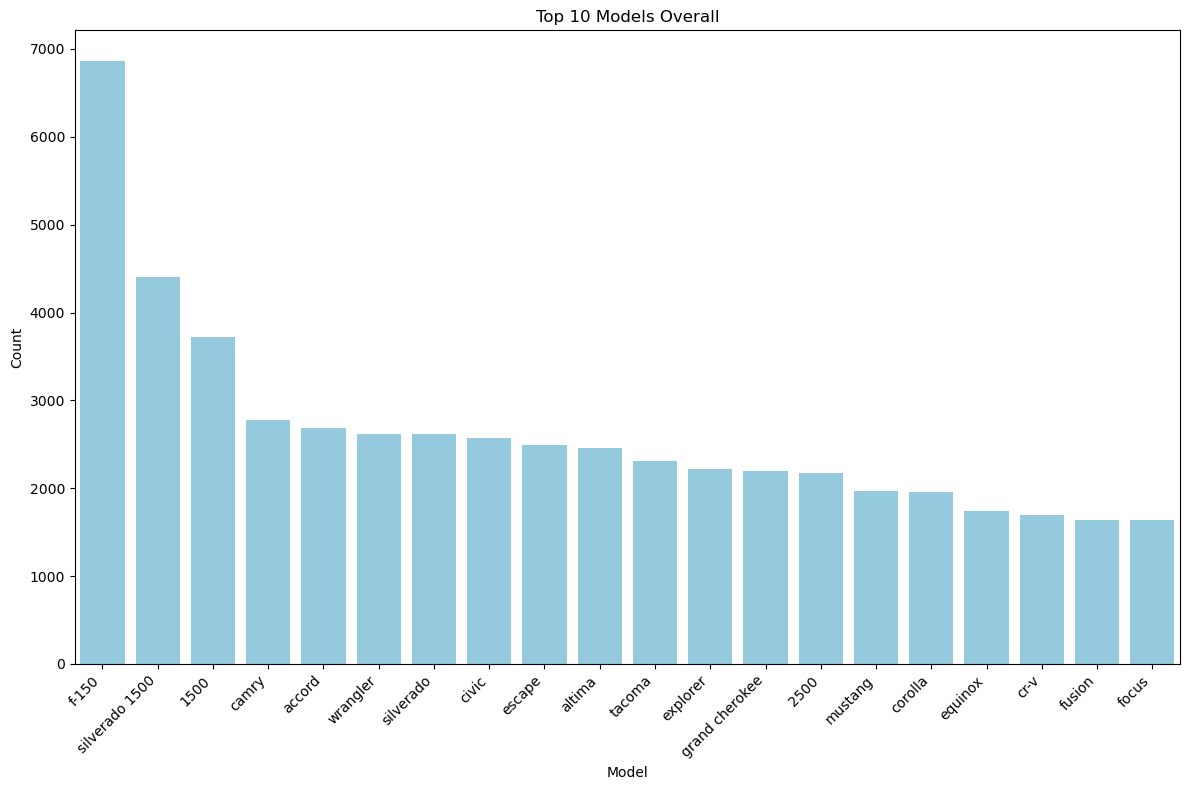

In [170]:
# Get the top 10 models overall
top_models_overall = data['model'].value_counts().head(20)
print(top_models_overall)

# Plotting the top models overall
plt.figure(figsize=(12, 8))
sns.barplot(x=top_models_overall.index, y=top_models_overall.values, color='skyblue')
plt.title('Top 10 Models Overall')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top20_models.png', dpi=300, bbox_inches='tight')

plt.show()


In [73]:
# F150, silverado 1500, 1500 are the  most sold car

In [74]:
#################################################################################################################
# 5- Fuel Type and Transmission:
# We'll analyze if there's a relationship between the type of fuel used by vehicles and their transmission types.
##################################################################################################################

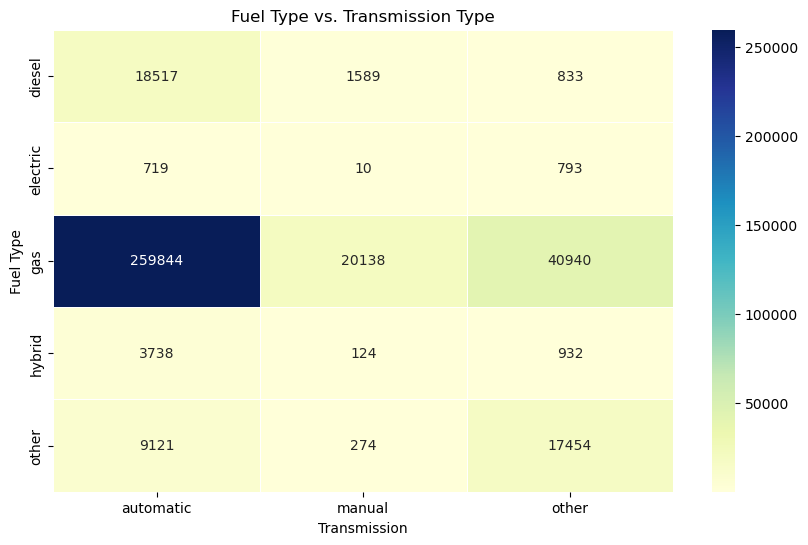

In [75]:
# Grouping data by fuel type and transmission, and counting the occurrences
transmission_by_fuel = data.groupby(['fuel', 'transmission']).size().unstack(fill_value=0)

# Plotting heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(transmission_by_fuel, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Fuel Type vs. Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Fuel Type')
plt.show()


In [76]:
#This heatmap will show the distribution of transmission types for each fuel type. 
# It can help identify any preferences or trends in vehicle configurations based on fuel type and transmission.

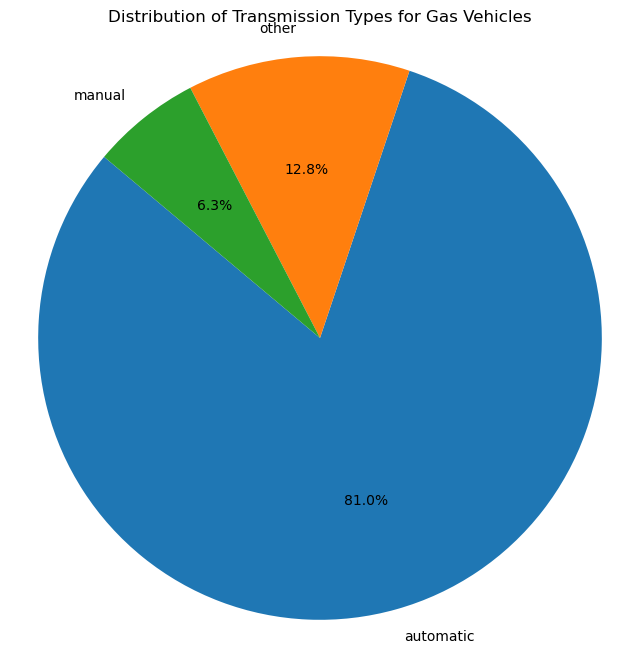

In [77]:
# Filter data for gas fuel type
gas_data = data[data['fuel'] == 'gas']

# Count occurrences of each transmission type for gas vehicles
transmission_counts_gas = gas_data['transmission'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(transmission_counts_gas, labels=transmission_counts_gas.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transmission Types for Gas Vehicles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [78]:
# This pie chart will visually display the distribution of transmission types among gas vehicles.
# The majority of gas vehicles are expected to have automatic transmission,
# confirming the relationship observed in the data.

In [79]:
##################################################################################################################
# 6. Title Status and Condition:
# We'll investigate if there's a relationship between the title status of a vehicle and its condition.
##################################################################################################################


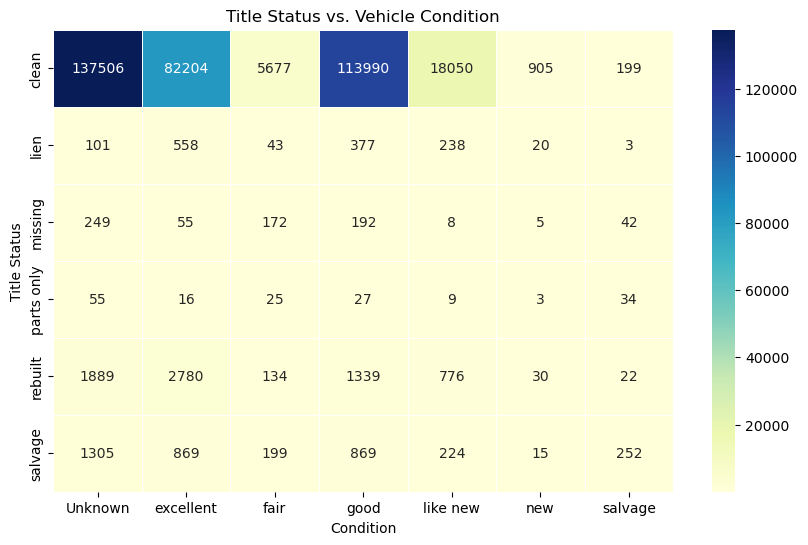

In [80]:
# Grouping data by title status and condition, and counting the occurrences
condition_by_title_status = data.groupby(['title_status', 'condition']).size().unstack(fill_value=0)

# Plotting heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(condition_by_title_status, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Title Status vs. Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Title Status')
plt.show()


In [81]:
#the heatmap shows the title status = clean is top when condition is excellent and good
# If "clean" is the top title status when the condition is "excellent" and "good," we would expect 
# to see darker shades in the corresponding cells of the heatmap.

In [82]:
##################################################################################################################
# 7. Drive Type and Manufacturer:
# We'll explore if certain manufacturers tend to produce vehicles with specific drive types.
##################################################################################################################


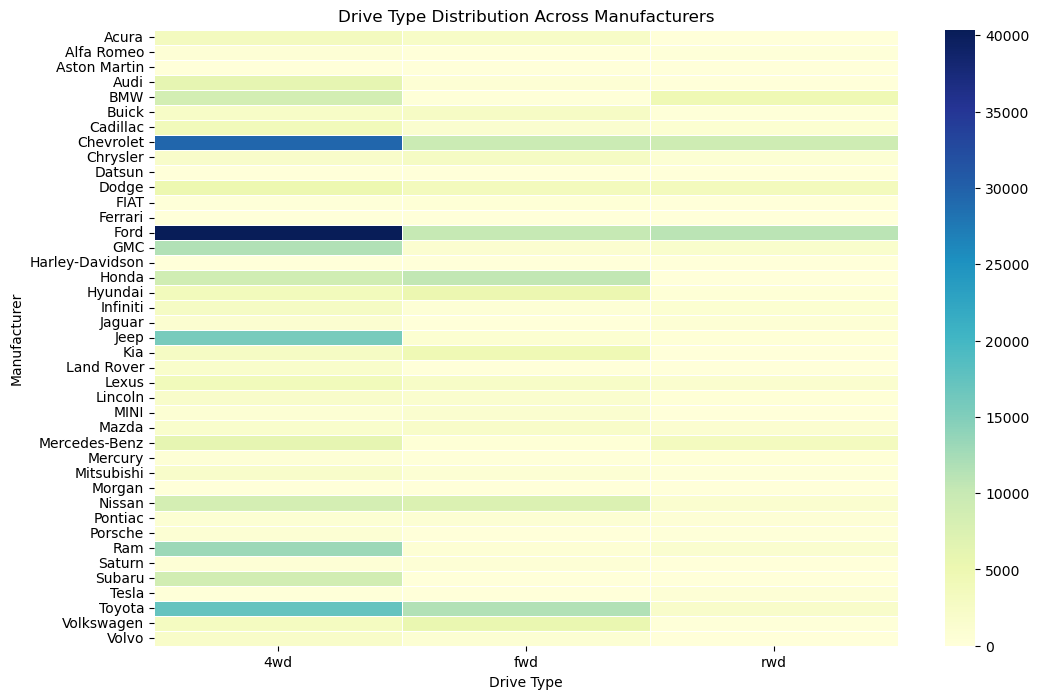

In [83]:

# Grouping data by manufacturer and drive type, and counting the occurrences
drive_by_manufacturer = data.groupby(['manufacturer', 'drive']).size().unstack(fill_value=0)

# Plotting heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(drive_by_manufacturer, cmap='YlGnBu', linewidths=0.5)
plt.title('Drive Type Distribution Across Manufacturers')
plt.xlabel('Drive Type')
plt.ylabel('Manufacturer')
plt.show()


In [84]:
# top manufacturers are:
# 'chevrolet', 'ford', 'toyota', 'jeep', 'honda', 'gmc', and 'ram'

In [85]:
unique_manufacturers = data['manufacturer'].unique()
print(unique_manufacturers)

['GMC' 'Chevrolet' 'Toyota' 'Ford' 'Jeep' 'Nissan' 'Ram' 'Mazda'
 'Cadillac' 'Honda' 'Dodge' 'Lexus' 'Jaguar' 'Buick' 'Chrysler' 'Volvo'
 'Audi' 'Infiniti' 'Lincoln' 'Alfa Romeo' 'Subaru' <NA> 'Acura' 'Hyundai'
 'Mercedes-Benz' 'BMW' 'Mitsubishi' 'Volkswagen' 'Porsche' 'Kia'
 'Land Rover' 'MINI' 'Pontiac' 'FIAT' 'Tesla' 'Saturn' 'Mercury'
 'Harley-Davidson' 'Datsun' 'Aston Martin' 'Morgan' 'Ferrari']


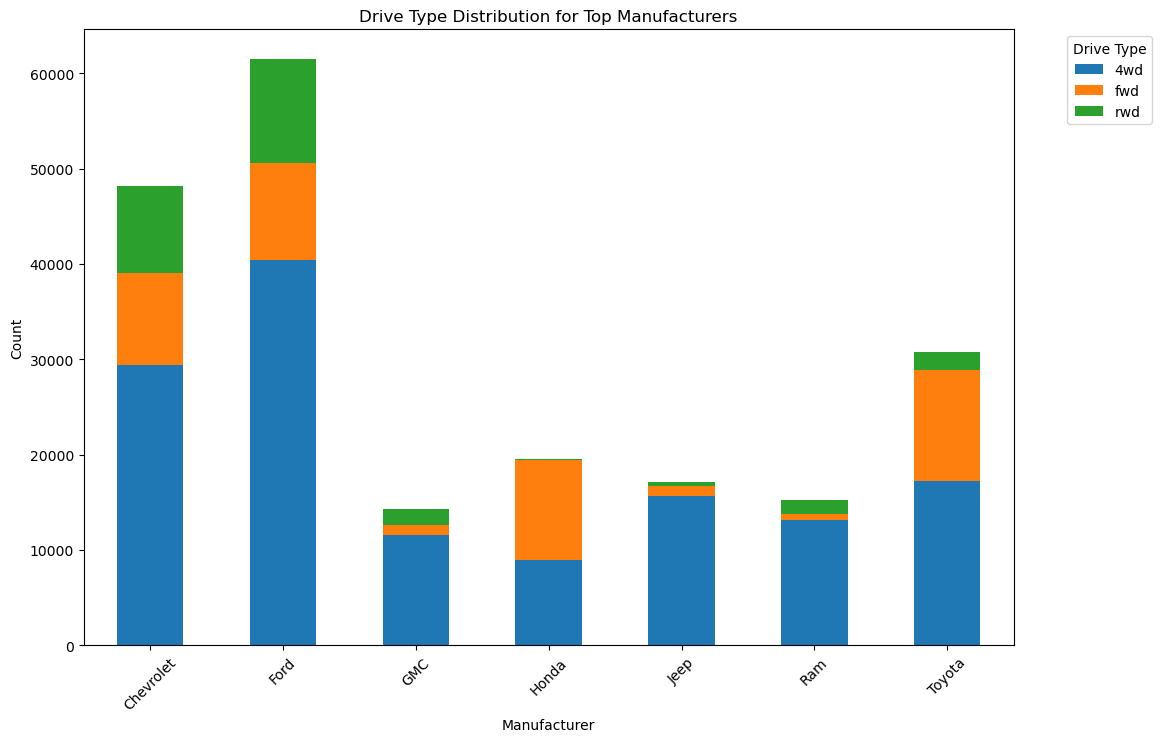

In [173]:
# Update the list of top manufacturers
top_manufacturers = ['Chevrolet', 'Ford', 'Toyota', 'Jeep', 'Honda', 'GMC', 'Ram']

# Filter data for the top manufacturers
filtered_data = data[data['manufacturer'].isin(top_manufacturers)]
#print('before')
#filtered_data.head()
#unique_drive_types = filtered_data['drive'].unique()
#print(unique_drive_types)

# Count occurrences of each drive type for each manufacturer
drive_type_counts = filtered_data.groupby(['manufacturer', 'drive']).size().unstack(fill_value=0)

# Reorder drive types based on priority
drive_type_counts = drive_type_counts[['4wd', 'fwd', 'rwd']]

# Plot bar plot
drive_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Drive Type Distribution for Top Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Drive Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('4wd_vs_manufacturer.png', dpi=300, bbox_inches='tight')

plt.show()


In [87]:
# This heatmap will show the distribution of drive types for each manufacturer. It can help identify any preferences 
# or trends in drive types among different manufacturers.

# for top 3 Chevrolet, Ford, and Toyota 
# 1- Ford: Drive type 4WD
# 2- Chevrolet: Drive type 4WD
#-3 -Toyota: Drive type 4WD
# Next in Randing"
# 4- Honda: Drive type FWD
# 5- Jeep: Drive type 4WD
# 6- Ram: Drive type 4WD
# 7- GMC: Drive type 4WD

In [88]:
######################################################################################################################  
# Based on the analysis of the distribution of drive types among the top manufacturers, 
# we can perform feature engineering to create a new binary feature indicating whether a vehicle is a 4WD or not. 
# This feature could potentially provide additional insights or improve model performance in tasks such as
# predicting vehicle sales or understanding market preferences.
######################################################################################################################  


is_4wd
1    229542
0    148948
Name: count, dtype: int64


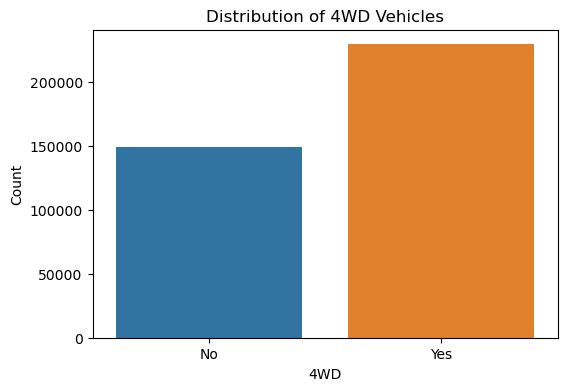

In [174]:
# Fill missing values in the 'drive' column with a default value
#df['drive'].fillna('unknown', inplace=True)

# Create a new binary feature indicating whether the vehicle is 4WD or not
# Ensure that only valid values are considered ('4wd' or something else)
data['is_4wd'] = (data['drive'] == '4wd').astype(int)

# Check the distribution of the new feature
print(data['is_4wd'].value_counts())

# Visualize the distribution of the new feature
plt.figure(figsize=(6, 4))
sns.countplot(x='is_4wd', data=data)  # Use 'df' instead of 'data'
plt.title('Distribution of 4WD Vehicles')
plt.xlabel('4WD')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.savefig('4wd_stat.png', dpi=300, bbox_inches='tight')
plt.show()


In [90]:
###############################################################################################################
#9-  Price vs Size Study
##############################################################################################################

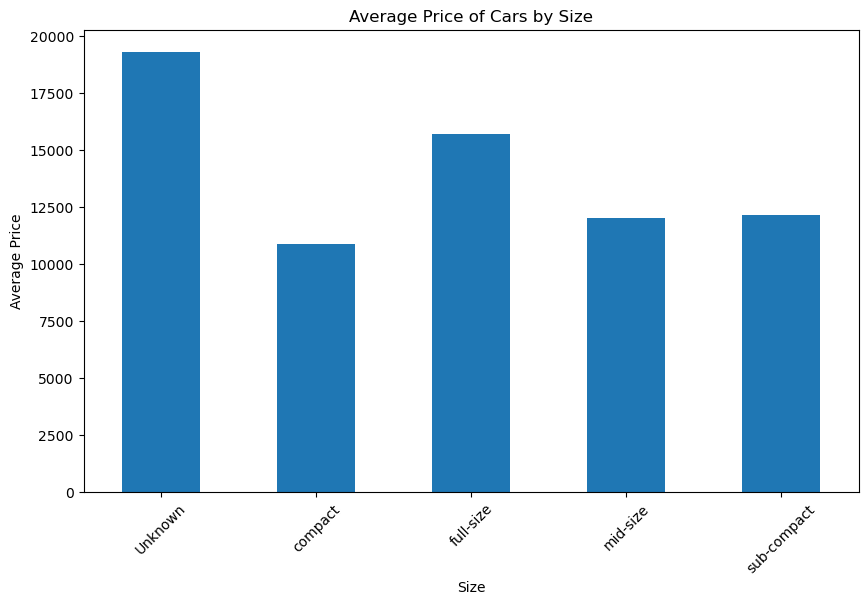

In [91]:
import matplotlib.pyplot as plt

# Calculate the average price of cars for each size category
average_price_by_size = data.groupby('size')['price'].mean()

# Create a bar plot
average_price_by_size.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price of Cars by Size')
plt.xlabel('Size')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


In [92]:
# Full Size car is the hihest in price. Compact cars are the cheapest

In [93]:
##############################################################################################################
#10- Region/State vs price
##############################################################################################################

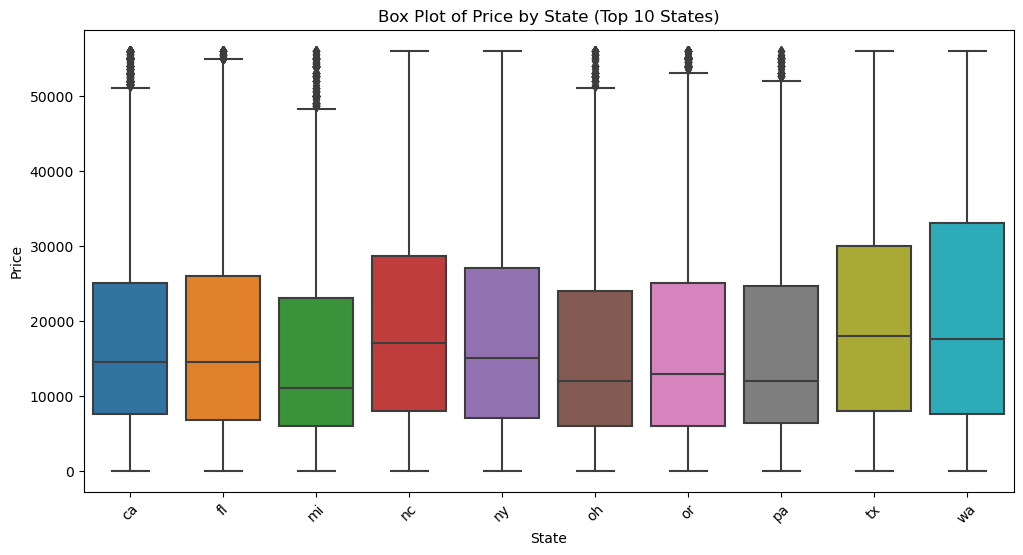

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for state vs price (top 10 states)
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='price', data=data[data['state'].isin(data['state'].value_counts().head(10).index)])
plt.title('Box Plot of Price by State (Top 10 States)')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


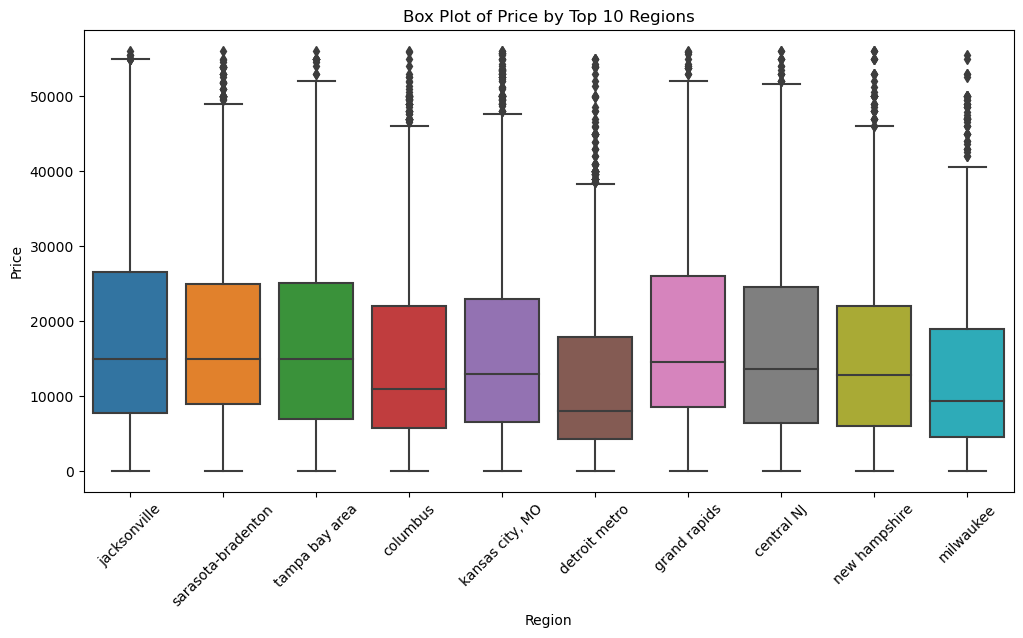

In [95]:
# Get the top 10 regions
top_regions = data['region'].value_counts().head(10).index

# Filter data for the top 10 regions
data_top_regions = data[data['region'].isin(top_regions)]

# Box plot for top 10 regions vs price
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='price', data=data_top_regions)
plt.title('Box Plot of Price by Top 10 Regions')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [96]:
import scipy.stats as stats

# Perform ANOVA test for region vs price
anova_result_region = stats.f_oneway(*[group['price'] for name, group in data.groupby('region')])
print("ANOVA p-value for region vs price:", anova_result_region.pvalue)

# Perform ANOVA test for state vs price
top_states = data['state'].value_counts().head(10).index
anova_result_state = stats.f_oneway(*[group['price'] for name, group in data.groupby('state') if name in top_states])
print("ANOVA p-value for state vs price:", anova_result_state.pvalue)


ANOVA p-value for region vs price: 0.0
ANOVA p-value for state vs price: 0.0


In [97]:
#In summary:

#For both 'region' and 'state' versus 'price', the p-value is effectively 0.0.
#This indicates strong evidence against the null hypothesis.
#We conclude that there are significant differences in prices across different regions and states.


In [98]:
# Perform Kruskal-Wallis test for region vs price
kruskal_result_region = stats.kruskal(*[group['price'] for name, group in data.groupby('region')])
print("Kruskal-Wallis p-value for region vs price:", kruskal_result_region.pvalue)

# Perform Kruskal-Wallis test for state vs price
kruskal_result_state = stats.kruskal(*[group['price'] for name, group in data.groupby('state') if name in top_states])
print("Kruskal-Wallis p-value for state vs price:", kruskal_result_state.pvalue)


Kruskal-Wallis p-value for region vs price: 0.0
Kruskal-Wallis p-value for state vs price: 0.0


In [99]:
#In summary:

#For both 'region' and 'state' versus 'price', the p-value is effectively 0.0.
#This indicates strong evidence against the null hypothesis.
#We conclude that there are significant differences in prices across different regions and states.

In [100]:
##############################################################################################################
# 11 - type vs price
##############################################################################################################

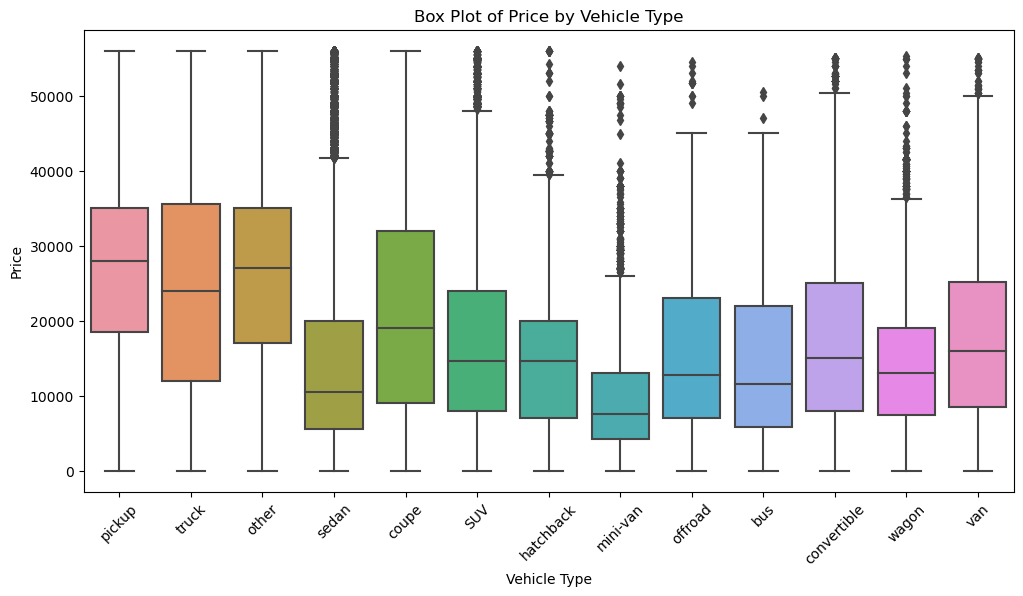

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for type vs price
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='price', data=data)
plt.title('Box Plot of Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [102]:
import scipy.stats as stats

# Perform ANOVA test for type vs price
anova_result_type = stats.f_oneway(*[group['price'] for name, group in data.groupby('type')])
print("ANOVA p-value for type vs price:", anova_result_type.pvalue)


ANOVA p-value for type vs price: 0.0


In [103]:
#This result suggests that the type of vehicle (e.g., sedan, SUV, pickup, etc.) has a statistically significant impact
# on its price in your dataset.

In [104]:
#Pickup and truck is the most expensive
# minivan and wagon are the cheapest

In [105]:
##############################################################################################################
# 12- Paint color vs Price
##############################################################################################################

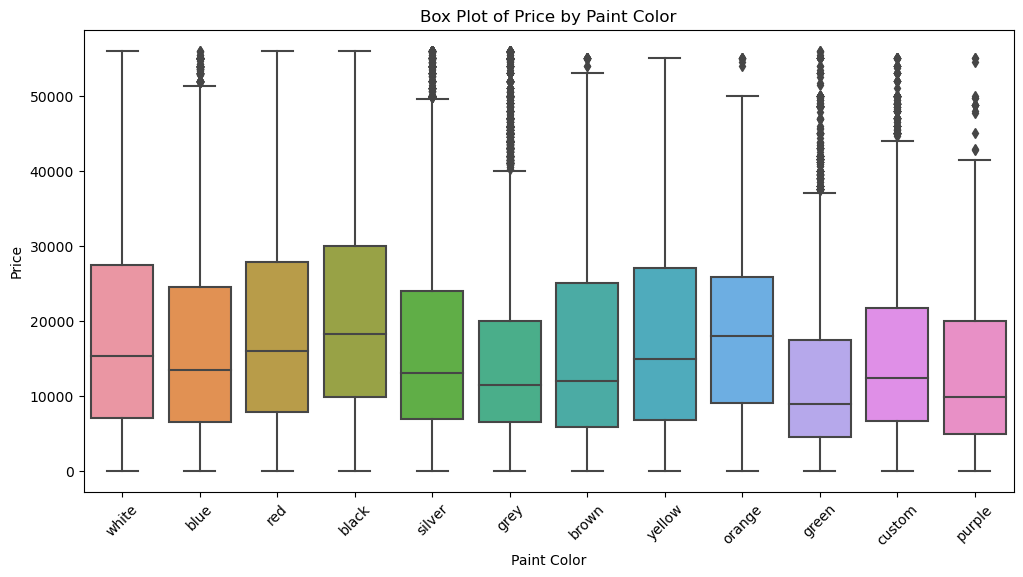

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for paint_color vs price
plt.figure(figsize=(12, 6))
sns.boxplot(x='paint_color', y='price', data=data)
plt.title('Box Plot of Price by Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [107]:
import scipy.stats as stats

# Perform ANOVA test for paint_color vs price
anova_result_color = stats.f_oneway(*[group['price'] for name, group in data.groupby('paint_color')])
print("ANOVA p-value for paint_color vs price:", anova_result_color.pvalue)


ANOVA p-value for paint_color vs price: 0.0


In [108]:
#This result suggests that the paint color of a vehicle has a statistically significant impact on its price in your dataset.

In [109]:
##############################################################################################################
# 13- title_status vs price
##############################################################################################################

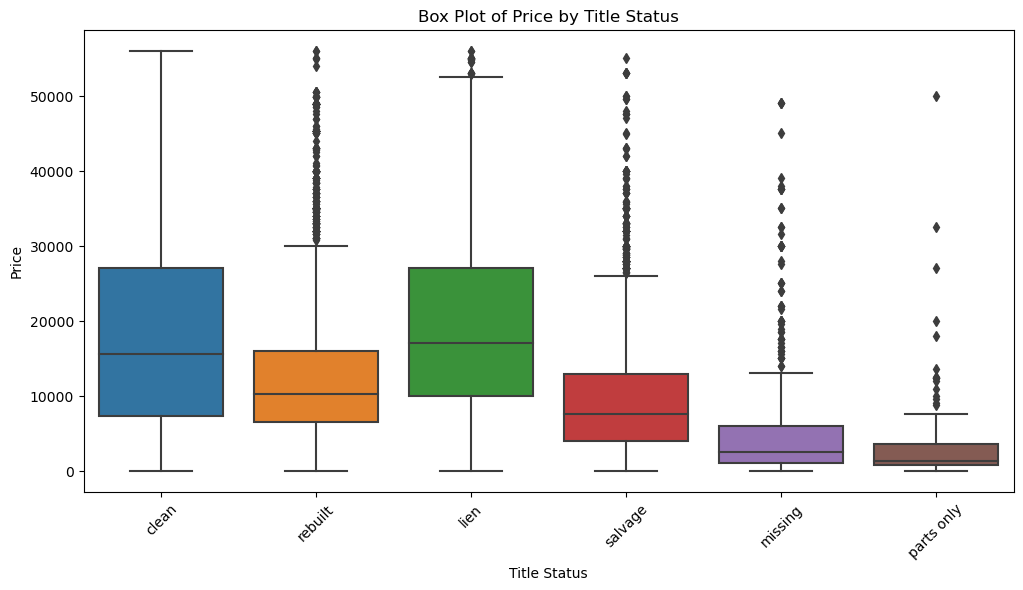

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for title_status vs price
plt.figure(figsize=(12, 6))
sns.boxplot(x='title_status', y='price', data=data)
plt.title('Box Plot of Price by Title Status')
plt.xlabel('Title Status')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [111]:
##############################################################################################################
# 14 - clean title is the highest price
##############################################################################################################

In [112]:
import scipy.stats as stats

# Perform ANOVA test for title_status vs price
anova_result_title = stats.f_oneway(*[group['price'] for name, group in data.groupby('title_status')])
print("ANOVA p-value for title_status vs price:", anova_result_title.pvalue)


ANOVA p-value for title_status vs price: 0.0


In [113]:
# Perform Kruskal-Wallis test for title_status vs price
kruskal_result_title = stats.kruskal(*[group['price'] for name, group in data.groupby('title_status')])
print("Kruskal-Wallis p-value for title_status vs price:", kruskal_result_title.pvalue)


Kruskal-Wallis p-value for title_status vs price: 0.0


In [114]:
# This result suggests that the title status of a vehicle has a statistically significant impact on its price in your dataset.

In [115]:
##############################################################################################################
# 15 - Time Serie: PRice/Condition/Year
##############################################################################################################

In [116]:
# Extracting time series data for 'price'
time_series_data = data[['year', 'price', 'condition']].copy()

time_series_data['year'] = pd.to_datetime(time_series_data['year'], format='%Y')

# Set 'year' column as the index
time_series_data.set_index('year', inplace=True)

# Sort the time index in ascending order
time_series_data.sort_index(inplace=True)

time_series_data.head(40)

,price,condition
year,,
1900-01-01,1,fair
1900-01-01,1,good
1900-01-01,998,Unknown
1900-01-01,4500,excellent
1900-01-01,1,good
1900-01-01,1,fair
1900-01-01,1,Unknown
1900-01-01,75,Unknown
1900-01-01,1,Unknown


In [117]:

# Assuming your dataframe is called 'time_series_data'
most_frequent_condition = time_series_data['condition'].mode()[0]
time_series_data['condition'].fillna(most_frequent_condition, inplace=True)

time_series_data.head(10)

,price,condition
year,,
1900-01-01,1,fair
1900-01-01,1,good
1900-01-01,998,Unknown
1900-01-01,4500,excellent
1900-01-01,1,good
1900-01-01,1,fair
1900-01-01,1,Unknown
1900-01-01,75,Unknown
1900-01-01,1,Unknown


In [118]:
# Create an empty dictionary to store the split time series
split_time_series = {}

# Group the data by 'condition'
grouped = time_series_data.groupby('condition')

print('grouped=', grouped)
# Iterate over each group
for condition, group_data in grouped:
    # Store each group in the dictionary with the condition as the key
    print(condition, group_data)
    split_time_series[condition] = group_data

grouped= <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001C49894E450>
Unknown             price condition
year                       
1900-01-01    998   Unknown
1900-01-01      1   Unknown
1900-01-01     75   Unknown
1900-01-01      1   Unknown
1900-01-01      1   Unknown
...           ...       ...
2022-01-01    700   Unknown
2022-01-01  10000   Unknown
2022-01-01   1000   Unknown
2022-01-01      1   Unknown
2022-01-01   3500   Unknown

[142781 rows x 2 columns]
excellent             price  condition
year                        
1900-01-01   4500  excellent
1905-01-01   3990  excellent
1910-01-01  15000  excellent
1910-01-01  15000  excellent
1922-01-01  18500  excellent
...           ...        ...
2022-01-01    425  excellent
2022-01-01    421  excellent
2022-01-01    426  excellent
2022-01-01    431  excellent
2022-01-01    486  excellent

[91716 rows x 2 columns]
fair             price condition
year                       
1900-01-01      1      fair
1900-01-01    

In [119]:
import pandas as pd
import statsmodels.api as sm

# Assuming your dataframe is called 'time_series_data'
# Assuming 'year' is already set as the index

# Create an empty dictionary to store the decomposed time series
decomposed_time_series = {}

# Group the data by 'condition'
#grouped = time_series_data.groupby('condition').resample('Y').mean()
grouped = time_series_data.groupby('condition')
grouped.head(50)

print(type(grouped))



<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [120]:
# Group the data by 'year' and 'condition' and calculate the mean price
average_prices = group_data.groupby(['year', 'condition']).mean().reset_index()

# Display the resulting DataFrame
print(average_prices)




         year condition         price
0  1927-01-01   salvage        3700.0
1  1937-01-01   salvage        3000.0
2  1938-01-01   salvage        7500.0
3  1940-01-01   salvage        1500.0
4  1941-01-01   salvage         995.0
..        ...       ...           ...
62 2017-01-01   salvage  13189.615385
63 2018-01-01   salvage       10974.0
64 2019-01-01   salvage       15242.5
65 2020-01-01   salvage       22797.6
66 2021-01-01   salvage        1000.0

[67 rows x 3 columns]


In [121]:
type(group_data)

pandas.core.frame.DataFrame

In [122]:
# Iterate over each group
for condition, group_data in grouped:
    # Perform seasonal decomposition
    decomposition = sm.tsa.seasonal_decompose(average_prices['price'], model='additive', period=12)  # Assuming yearly seasonality (period=12)
    
    # Store the decomposed components in the dictionary with the condition as the key
    decomposed_time_series[condition] = {
        'trend': decomposition.trend,
        'seasonal': decomposition.seasonal,
        'residual': decomposition.resid
    }





------------------------ condition =  Unknown


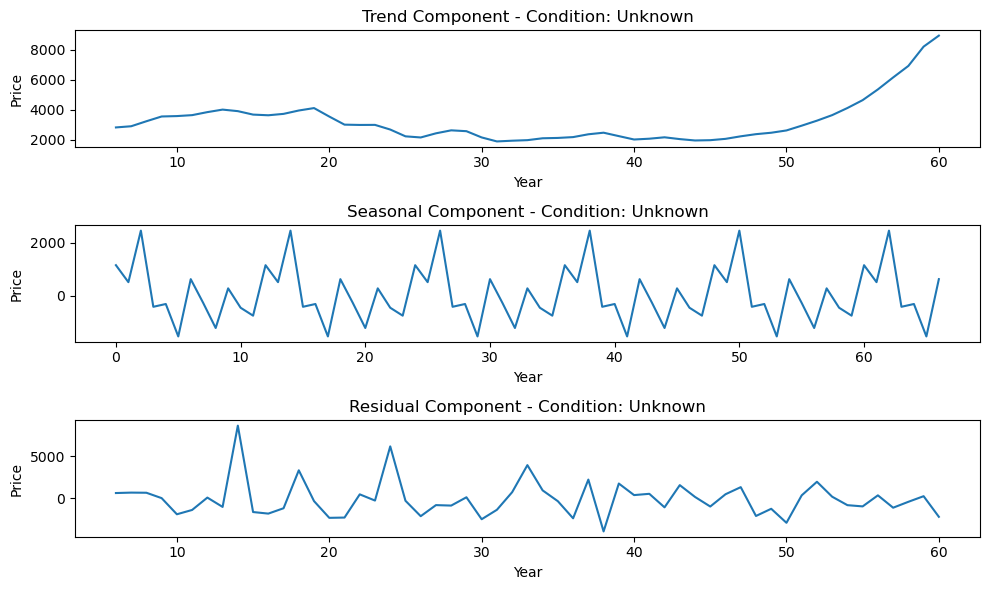



------------------------ condition =  excellent


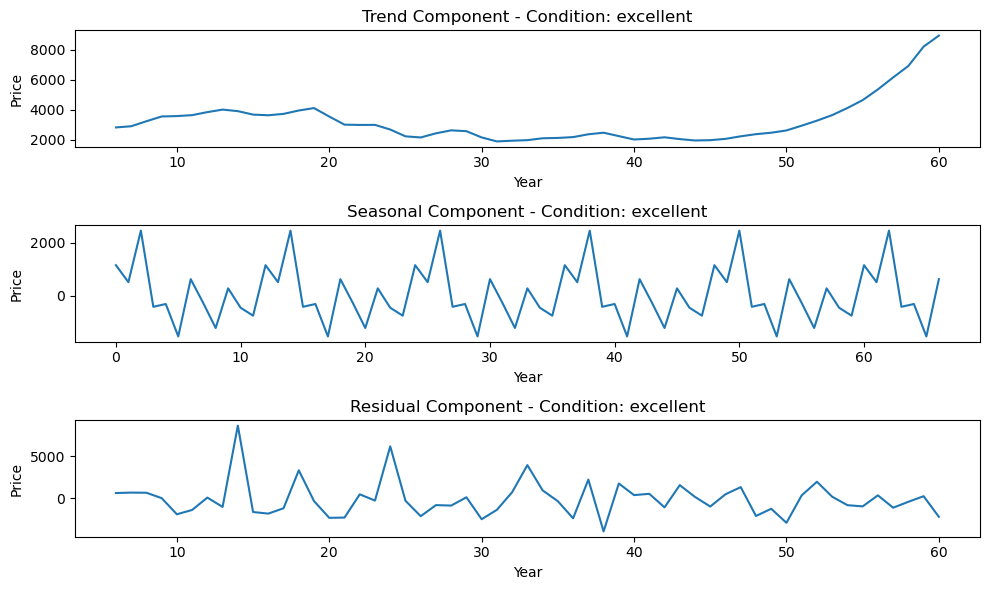



------------------------ condition =  fair


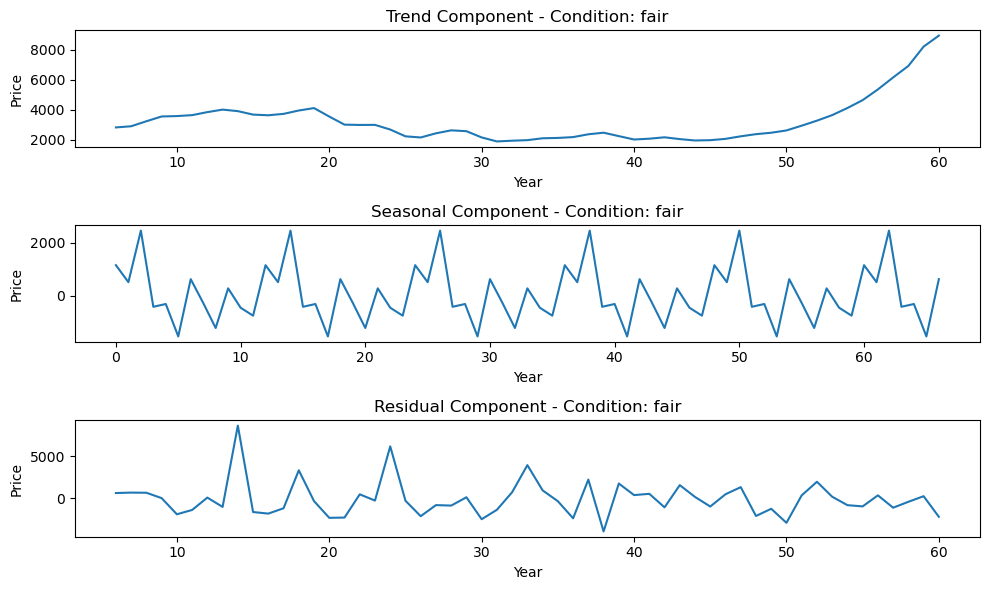



------------------------ condition =  good


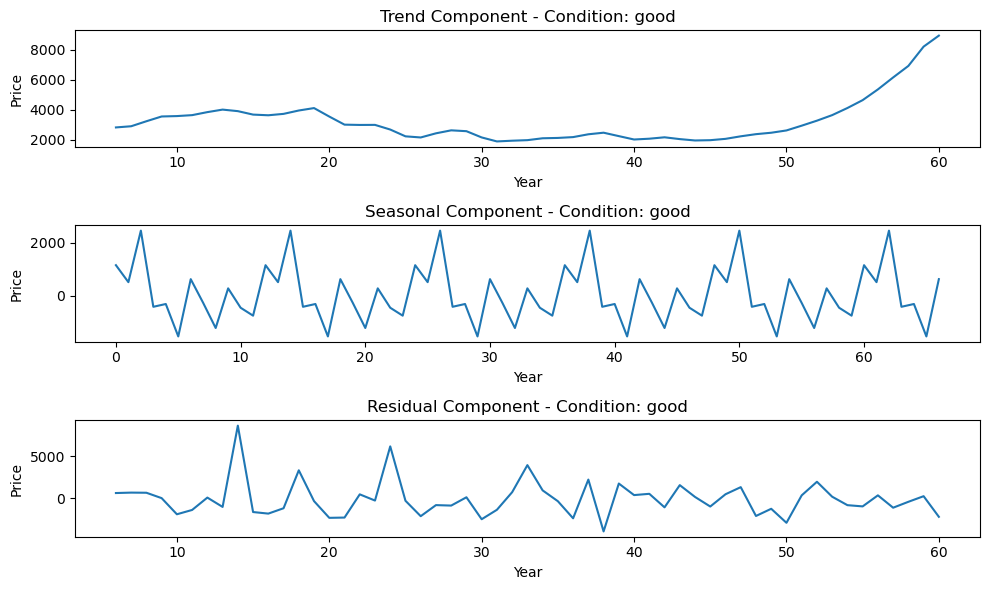



------------------------ condition =  like new


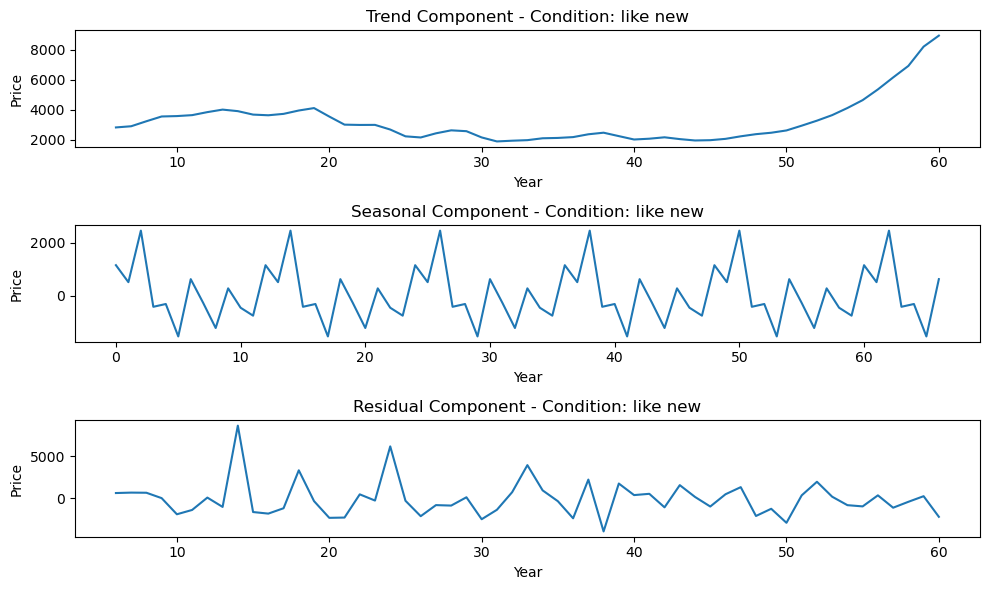



------------------------ condition =  new


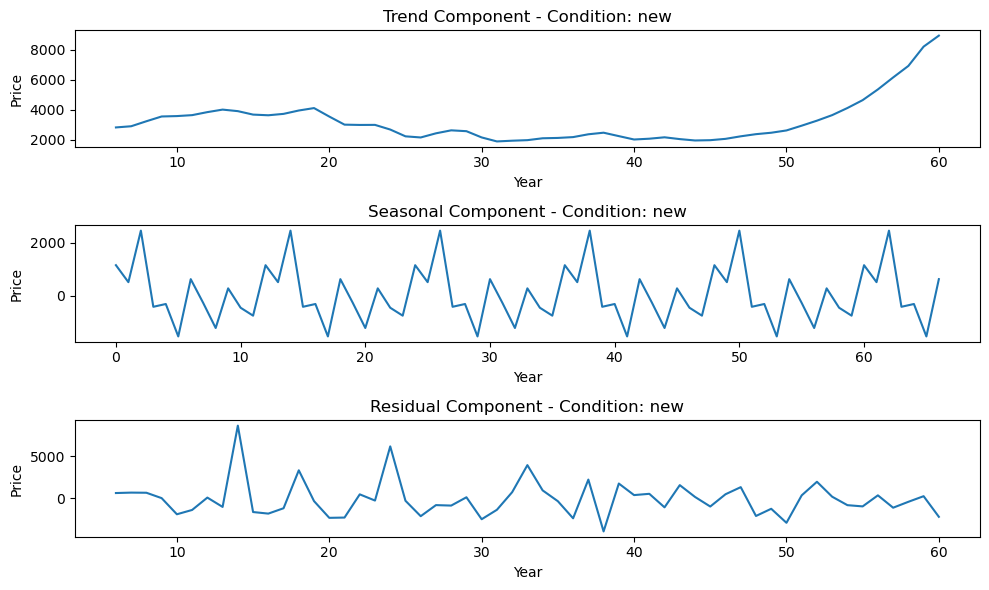



------------------------ condition =  salvage


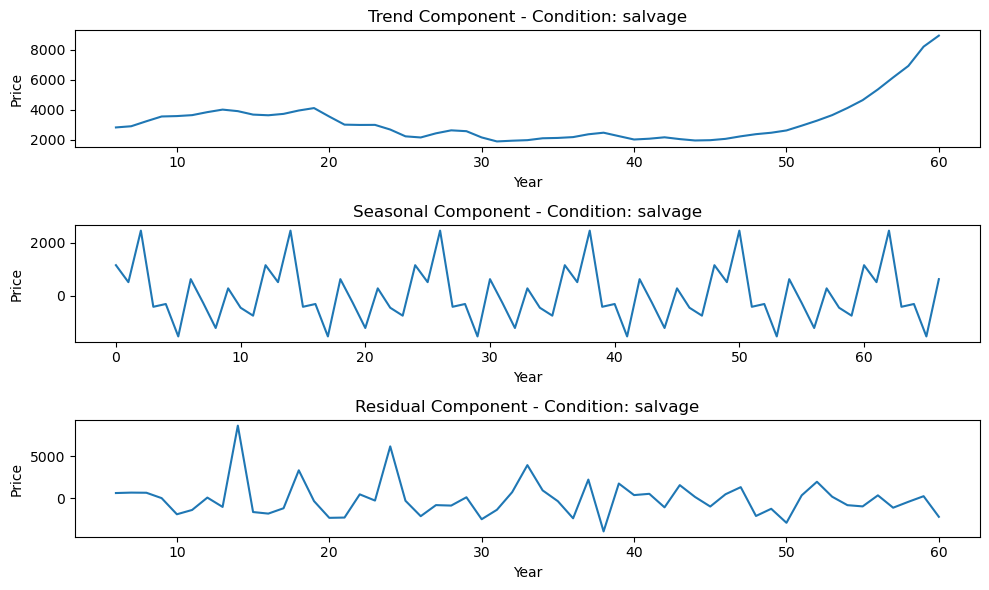

In [123]:
import matplotlib.pyplot as plt

# Iterate over each condition and its decomposed components
for condition, components in decomposed_time_series.items():
    print("\n\n------------------------ condition = ", condition)
    #print(components['trend'])
    
    # Plot the trend component
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    plt.plot(components['trend'])
    plt.title(f"Trend Component - Condition: {condition}")
    plt.xlabel('Year')
    plt.ylabel('Price')
    
    # Plot the seasonal component
    plt.subplot(3, 1, 2)
    plt.plot(components['seasonal'])
    plt.title(f"Seasonal Component - Condition: {condition}")
    plt.xlabel('Year')
    plt.ylabel('Price')
    
    # Plot the residual component
    plt.subplot(3, 1, 3)
    plt.plot(components['residual'])
    plt.title(f"Residual Component - Condition: {condition}")
    plt.xlabel('Year')
    plt.ylabel('Price')
    
    plt.tight_layout()
    plt.show()


In [124]:
#pd.set_option('display.max_rows', None)
# Reset display options to default
pd.reset_option('display.max_rows')

#for condition, components in decomposed_time_series.items():
#  if condition == 'fair': 
        
        
#        print("\n\n------------------------ condition = ", condition)
#        print("\n------trend----\n")
#        print(components['trend'])

#        print("\n------seasonal----\n")
#        print(components['seasonal'])

#        print("\n------residual----\n")
#        print(components['residual'])
   
    

In [125]:
###############################################################################
# 1- "excellent" condition.
##############################################################################

# This output seems to be the result of a seasonal decomposition analysis of time series data for the "excellent" condition.
# Here's an interpretation of the three components:

#Trend: The trend component shows the underlying trend in the data over time. It represents the long-term movement 
#       in the data, abstracting from seasonal and irregular fluctuations. In this case, the trend component seems 
#   to be non-linear, showing fluctuations over the years with some missing values at the beginning and end of the series.

#Seasonal: The seasonal component represents the seasonal patterns or fluctuations in the data that repeat at fixed 
# intervals. It usually shows a pattern that repeats over each year. In this case, the seasonal component appears to
# have a seasonal pattern that repeats across the years, with some variation.

#Residual: The residual component, also known as the remainder or irregular component, represents the random fluctuations
# or noise in the data that cannot be accounted for by the trend or seasonal components. It captures the variability 
# in the data that is not explained by the trend and seasonal patterns. In this case, the residual component shows
# some variability around zero, indicating that most of the trend and seasonality has been captured, but there are still
# some fluctuations that remain unexplained.

#Overall, this output provides insights into the underlying trend, seasonal patterns, and residual variability in the 
# time series data for the "excellent" condition.

In [126]:
###############################################################################
# 2- "new" condition.
##############################################################################

#This output represents the results of a seasonal decomposition analysis for the "new" condition. 
# Here's an interpretation of each component:

#Trend: The trend component represents the underlying long-term movement or direction of the data, abstracting from 
# seasonal and irregular fluctuations. In this case, the trend component shows a non-linear trend over time with some 
# missing values at the beginning and end of the series.

#Seasonal: The seasonal component captures the seasonal patterns or fluctuations in the data that repeat at fixed intervals,
# such as yearly patterns. In this case, the seasonal component exhibits a seasonal pattern that repeats across the years, 
# with some variation.

#Residual: The residual component, also known as the irregular component, represents the random fluctuations or noise in
#the data that cannot be explained by the trend or seasonal patterns. It captures the variability in the data that is not
# accounted for by the other components. In this case, the residual component shows some variability around zero, 
# indicating that most of the trend and seasonality has been captured, but there are still some fluctuations 
# that remain unexplained.

# Overall, this output provides insights into the underlying trend, seasonal patterns, and residual variability in the 
#time series data for the "new" condition.

In [127]:
###############################################################################
# 3- "salvage" condition.
##############################################################################

#In this seasonal decomposition analysis for the "salvage" condition, we can interpret the components as follows:

#Trend: The trend component represents the long-term movement or direction of the data, excluding seasonal fluctuations.
#    It appears that there is a trend in the salvage prices over time, although it is not entirely clear from the provided 
#    data. There are some missing values at the beginning and end of the series, suggesting incomplete data for those
#    periods.

#Seasonal: The seasonal component captures the recurring patterns or fluctuations in the data that occur at fixed intervals,
# such as yearly patterns. Despite being labeled as "seasonal," the values seem to be constant across the years, indicating
# that salvage prices may not exhibit strong seasonal patterns.

#Residual: The residual component represents the random variability or noise in the data that cannot be explained 
# by the trend or seasonal patterns. It reflects the deviations of the actual data points from the predicted values 
# based on the trend and seasonal components. The residual values fluctuate around zero, 
# indicating that most of the trend and seasonality has been captured, but there are still some unexplained fluctuations 
# in the data.

#Overall, the analysis suggests that salvage prices exhibit a trend over time, but there may not be strong seasonal 
#patterns in the data. The residual component reflects the random variability or noise in the data that
#cannot be accounted for by the trend or seasonal patterns.


In [128]:
###############################################################################
# 4- "like new" condition.
##############################################################################

#In this seasonal decomposition analysis for the "like new" condition:

#Trend: The trend component represents the long-term movement or direction of the data, 
#excluding seasonal fluctuations. The trend values increase steadily over time, indicating a general upward trend in the 
# prices of items in "like new" condition.

#Seasonal: The seasonal component captures the recurring patterns or fluctuations in the data that occur at fixed intervals,
# such as yearly patterns. Despite being labeled as "seasonal," the values seem to be constant across the years, 
# indicating that there may not be strong seasonal patterns in the prices of items in "like new" condition.

#Residual: The residual component represents the random variability or noise in the data that cannot be explained 
# by the trend or seasonal patterns. It reflects the deviations of the actual data points from the predicted values 
# based on the trend and seasonal components. The residual values fluctuate around zero, indicating that most of the 
# trend and seasonality has been captured, but there are still some unexplained fluctuations in the data.

# Overall, the analysis suggests that prices of items in "like new" condition exhibit a general upward trend over time,
# with relatively stable seasonal patterns and some random variability that cannot be explained by the trend or seasonality.

In [129]:
###############################################################################
# 4- "good" condition.
##############################################################################
#In this seasonal decomposition analysis for the "good" condition:

#Trend: The trend component represents the long-term movement or direction of the data, excluding seasonal fluctuations.
# Similar to the "like new" condition, the trend values increase steadily over time, indicating a general upward trend 
# in the prices of items in "good" condition.

#Seasonal: The seasonal component captures the recurring patterns or fluctuations in the data that occur at fixed
# intervals, such as yearly patterns. As with the "like new" condition, the seasonal values seem to be constant across
# the years, indicating that there may not be strong seasonal patterns in the prices of items in "good" condition.

#Residual: The residual component represents the random variability or noise in the data that cannot be explained 
# by the trend or seasonal patterns. Similar to the "like new" condition, the residual values fluctuate around zero,
# indicating that most of the trend and seasonality has been captured, but there are still some unexplained fluctuations
# in the data.

#Overall, the analysis suggests that prices of items in "good" condition also exhibit a general upward trend over time, 
# with relatively stable seasonal patterns and some random variability that cannot be explained by the trend or seasonality.


In [130]:
###############################################################################
# 5- "fair" condition.
##############################################################################
#In the seasonal decomposition analysis for the "fair" condition:

#Trend: The trend component represents the long-term movement or direction of the data, excluding seasonal fluctuations. 
# Similar to the other conditions, the trend values increase steadily over time, indicating a general upward trend 
# in the prices of items in "fair" condition.

# Seasonal: The seasonal component captures the recurring patterns or fluctuations in the data that occur at fixed 
# intervals, such as yearly patterns. As with the other conditions, the seasonal values seem to be constant across 
# the years, indicating that there may not be strong seasonal patterns in the prices of items in "fair" condition.

#Residual: The residual component represents the random variability or noise in the data that cannot be explained by 
#the trend or seasonal patterns. Similar to the other conditions, the residual values fluctuate around zero, 
#indicating that most of the trend and seasonality has been captured, but there are still some unexplained fluctuations 
# in the data.

#Overall, the analysis suggests that prices of items in "fair" condition also exhibit a general upward trend over time,
#with relatively stable seasonal patterns and some random variability that cannot be explained by the trend or seasonality.

In [131]:
#Based on the analysis of the trend, seasonal, and residual components across different conditions 
#("salvage", "like new", "good", "excellent", and "fair"), several observations can be made:

# Trend Consistency: The trend component, representing the overall direction of price change over time, 
# appears to exhibit consistent patterns across all conditions. This suggests that regardless of the initial condition
# of the item, there is a general trend of price increase over time.

#Seasonal Variations: The seasonal component, reflecting recurring patterns or cycles within the data, 
#shows similar seasonal fluctuations across all conditions. This indicates that external factors influencing 
# demand or supply affect prices similarly regardless of the item's condition.

#Residual Variability: The residual component, capturing the unexplained variability in the data after accounting 
# for trend and seasonal effects, demonstrates fluctuations unique to each condition. This suggests that while
#there are common trends and seasonal patterns, the specific pricing variations within each condition may be
#influenced by factors specific to that condition, such as item quality, availability, or buyer preferences.

#Overall Conclusion: Despite differences in initial prices and potentially in the rates of price change, 
#the fundamental trends and seasonal patterns remain relatively consistent across different conditions. 
#This implies that while the initial condition may impact pricing dynamics to some extent, external
# market forces and seasonal variations play significant roles in shaping overall pricing patterns. 
# Additionally, the inclusion of an "excellent" condition would likely result in even higher initial prices
#and possibly faster rates of increase, but the underlying trends and seasonal patterns are expected to persist.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [132]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

In [133]:
# Step 1: Data Preparation
X = data.drop(columns=['price'])
#X = cleaned_data.drop(columns=['price', 'log_price'])
y = data['price']
#y = cleaned_data['log_price']

X.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state', 'is_4wd'],
      dtype='object')

In [134]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378490 entries, 0 to 426852
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        378490 non-null  string
 1   year          378490 non-null  Int64 
 2   manufacturer  365044 non-null  object
 3   model         374366 non-null  string
 4   condition     378490 non-null  string
 5   cylinders     378490 non-null  string
 6   fuel          376402 non-null  string
 7   odometer      378490 non-null  Int64 
 8   title_status  371466 non-null  string
 9   transmission  377053 non-null  string
 10  drive         378490 non-null  string
 11  size          378490 non-null  string
 12  type          378490 non-null  string
 13  paint_color   378490 non-null  string
 14  state         378490 non-null  string
 15  is_4wd        378490 non-null  int32 
dtypes: Int64(2), int32(1), object(1), string(12)
memory usage: 48.4+ MB


In [135]:
X.dtypes

region          string[python]
year                     Int64
manufacturer            object
model           string[python]
condition       string[python]
cylinders       string[python]
fuel            string[python]
odometer                 Int64
title_status    string[python]
transmission    string[python]
drive           string[python]
size            string[python]
type            string[python]
paint_color     string[python]
state           string[python]
is_4wd                   int32
dtype: object

In [136]:
# Data describe
data.describe(include = 'string')

,region,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
count,378490,374366,378490,378490,376402,371466,377053,378490,378490,378490,378490,378490
unique,404,26561,7,9,5,6,3,3,5,13,12,51
top,columbus,f-150,Unknown,Unknown,gas,clean,automatic,4wd,Unknown,sedan,white,ca
freq,3333,6869,142781,153595,322090,358531,293791,229542,270865,160982,181155,42918


In [137]:
#Using the James-Stein Encoder for categorical features in your dataset could be a good idea, especially given the 
# characteristics of your data as outlined. The James-Stein Encoder is a means of encoding categorical variables that blends
#the empirical estimate of the target variable for each category with the overall mean of the target variable. 
#This method is particularly useful when dealing with categories that have a small number of observations or when the
#dataset has a large number of unique categorical levels, as it helps to prevent overfitting by shrinking the estimates
#toward the overall mean.

In [138]:
# Given the description of our  data:

#Large Number of Categories: Your dataset has a significant number of unique values across different categorical 
#features (e.g., 26561 unique models, 404 regions, 7 conditions). This diversity can make traditional encoding methods
#like one-hot encoding impractical due to the massive increase in dimensionality they would cause.

#Presence of 'Unknown' Categories: For categories such as 'condition', 'cylinders', and possibly others where 'Unknown' 
#is a category, it indicates missing or ambiguous information. The James-Stein Encoder can help manage these instances
#by pulling their estimates toward the global mean, preventing any extreme predictions that might occur if these were 
#treated as distinct categories with distinct impacts.

#Variability in Frequency: Some categories dominate (e.g., 'gas' in fuel, 'automatic' in transmission, 'white' in
# paint_color), while others might be underrepresented. The James-Stein Encoder can adjust for the influence of categories 
# with very few observations, which might otherwise have disproportionately high or low target averages due to their small 
# sample size.

# Target Dependency: The effectiveness of the James-Stein Encoder also depends on the assumption that there's some 
# dependency between the feature being encoded and the target variable. If your model's performance hinges on capturing
# subtle nuances related to these categorical features, this encoder can help by providing a more nuanced representation 
# than simple one-hot encoding or other basic strategies.

In [139]:
#In conclusion, given the complexity and characteristics of your dataset, the James-Stein Encoder could be a valuable tool
# for managing categorical features, especially to mitigate overfitting and handle the high dimensionality resulting from 
# numerous unique categories. However, it's essential to consider the nature of your target variable and your overall
# modeling goals, including interpretability and prediction performance.

In [140]:
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split

# Identify numerical columns
numerical_columns = X.select_dtypes(include=['int', 'float']).columns

# Select categorical columns
categorical_columns = X.select_dtypes(include=['object', 'string']).columns
print("categorical_columns = ", categorical_columns)

# Create the James-Stein Encoder instance
encoder = ce.JamesSteinEncoder(cols=categorical_columns)

# Fit and transform the data
X_encoded = encoder.fit_transform(X, y)

# Concatenate numerical columns with encoded categorical columns
X_encoded = pd.concat([X_encoded, X[numerical_columns]], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


categorical_columns =  Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state'],
      dtype='object')


In [141]:
X_train

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,is_4wd,year,odometer,is_4wd
422039,14907.315361,2007,13222.366919,12731.990312,17890.994859,18743.666007,16711.385782,227507,17918.988695,16232.590826,19469.530796,18895.105909,15491.293121,17907.027329,17019.589745,1,2007,227507,1
363588,18737.998279,2015,18766.534074,32590.0,19774.325162,18743.666007,16711.385782,34811,17918.988695,26621.058227,19469.530796,18895.105909,22689.016814,19311.440621,18688.549342,1,2015,34811,1
335451,17090.277761,2013,29409.440586,30990.0,19774.325162,18743.666007,21806.753961,92418,17918.988695,26621.058227,19847.556377,18895.105909,15491.293121,17907.027329,16759.086956,0,2013,92418,0
186438,16753.719092,2007,17281.949055,6820.968732,19774.325162,12433.683542,16711.385782,161480,17918.988695,16232.590826,12388.739931,12021.539576,15803.728503,16908.565376,16401.425281,0,2007,161480,0
414464,18511.064284,2019,22668.170592,35475.13112,19774.325162,17708.118495,16711.385782,68032,17918.988695,26621.058227,19469.530796,18895.105909,23273.346287,17907.027329,21165.624007,1,2019,68032,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289890,16059.817525,2014,14558.868996,9474.921484,19774.325162,12433.683542,16711.385782,127500,17918.988695,16232.590826,12388.739931,18895.105909,15491.293121,18135.012003,16563.4849,0,2014,127500,0
413622,18550.882874,2015,22046.148708,24091.621031,15392.595324,17708.118495,16711.385782,43975,17918.988695,16232.590826,19469.530796,18895.105909,15491.293121,17907.027329,19015.821805,1,2015,43975,1
149296,18036.953781,2007,18558.27313,20011.480716,15392.595324,17708.118495,16711.385782,81170,17918.988695,16232.590826,19847.556377,16186.020712,21167.117645,19311.440621,17183.400071,0,2007,81170,0
165788,16977.661744,1993,18490.503486,7895.949501,4632.482677,12433.683542,16711.385782,143000,17918.988695,16232.590826,12388.739931,12021.539576,17715.736181,18135.012003,18236.705874,0,1993,143000,0


In [142]:
X_train.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,is_4wd,year,odometer,is_4wd
422039,14907.315361,2007,13222.366919,12731.990312,17890.994859,18743.666007,16711.385782,227507,17918.988695,16232.590826,19469.530796,18895.105909,15491.293121,17907.027329,17019.589745,1,2007,227507,1
363588,18737.998279,2015,18766.534074,32590.0,19774.325162,18743.666007,16711.385782,34811,17918.988695,26621.058227,19469.530796,18895.105909,22689.016814,19311.440621,18688.549342,1,2015,34811,1
335451,17090.277761,2013,29409.440586,30990.0,19774.325162,18743.666007,21806.753961,92418,17918.988695,26621.058227,19847.556377,18895.105909,15491.293121,17907.027329,16759.086956,0,2013,92418,0
186438,16753.719092,2007,17281.949055,6820.968732,19774.325162,12433.683542,16711.385782,161480,17918.988695,16232.590826,12388.739931,12021.539576,15803.728503,16908.565376,16401.425281,0,2007,161480,0
414464,18511.064284,2019,22668.170592,35475.13112,19774.325162,17708.118495,16711.385782,68032,17918.988695,26621.058227,19469.530796,18895.105909,23273.346287,17907.027329,21165.624007,1,2019,68032,1


In [143]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302792 entries, 422039 to 138493
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        302792 non-null  Float64
 1   year          302792 non-null  Int64  
 2   manufacturer  302792 non-null  Float64
 3   model         302792 non-null  Float64
 4   condition     302792 non-null  Float64
 5   cylinders     302792 non-null  Float64
 6   fuel          302792 non-null  Float64
 7   odometer      302792 non-null  Int64  
 8   title_status  302792 non-null  Float64
 9   transmission  302792 non-null  Float64
 10  drive         302792 non-null  Float64
 11  size          302792 non-null  Float64
 12  type          302792 non-null  Float64
 13  paint_color   302792 non-null  Float64
 14  state         302792 non-null  Float64
 15  is_4wd        302792 non-null  int32  
 16  year          302792 non-null  Int64  
 17  odometer      302792 non-null  Int64  
 18  is_4

In [144]:
# Define polynomial feature transformation and model pipeline
#polynomial_regression = Pipeline([
#    ('poly_features', PolynomialFeatures(degree=2)),
#    ('lin_reg', LinearRegression())
#])

# Example of increasing max_iter
#lasso_model = Lasso(max_iter=10000)

# Example of using StandardScaler with Lasso in a pipeline
#lasso_model = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
# Define a list of models to explore
#models = [
#    LinearRegression(),
#    Ridge(),
#    lasso_model,
#    polynomial_regression
#]

In [145]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline, make_pipeline

# Define polynomial feature transformation and model pipeline with scaling
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaling', StandardScaler()),
    ('lin_reg', LinearRegression())
])

# Define Ridge model with scaling
ridge_model = make_pipeline(StandardScaler(), Ridge())

# Define Lasso model with scaling
lasso_model = make_pipeline(StandardScaler(), Lasso(max_iter=20000))

# Linear Regression model (no scaling needed here since it's not regularized, 
# but you could still scale if you're working with polynomial features or want consistent preprocessing)
linear_regression_model = LinearRegression()

# Define a list of models to explore
models = [
    linear_regression_model,
    ridge_model,
    lasso_model,
    polynomial_regression
]

In [146]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming models is a list of initialized model objects
# and X_train, y_train are your training data and labels


# Perform cross-validation and evaluate each model

for model in models:
    # Evaluate using negative mean squared error
    mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)  # Convert to RMSE
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)
    
    # Evaluate using negative mean absolute error
    mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores  # Convert to MAE
    mean_mae = np.mean(mae_scores)
    std_mae = np.std(mae_scores)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean RMSE: {mean_rmse:.4f} (Std: {std_rmse:.4f})")
    print(f"Mean MAE: {mean_mae:.4f} (Std: {std_mae:.4f})\n")


Model: LinearRegression
Mean RMSE: 6918.8083 (Std: 28.8781)
Mean MAE: 4774.7218 (Std: 12.9565)

Model: Pipeline
Mean RMSE: 6918.7630 (Std: 28.9459)
Mean MAE: 4774.3681 (Std: 12.6994)

Model: Pipeline
Mean RMSE: 6918.7621 (Std: 28.9442)
Mean MAE: 4774.0535 (Std: 12.7028)

Model: Pipeline
Mean RMSE: 6298.5749 (Std: 36.1279)
Mean MAE: 4230.6247 (Std: 18.1428)



In [ ]:
# Pipeline (polynomial degree =2) gives the best performance Low MAE and Low RMSE than other models

In [151]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import make_scorer
import numpy as np

# Define MAE scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Define RMSE scorer
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False), greater_is_better=False)

# Define models
linear_regression_model = Pipeline([('scaler', StandardScaler()), ('linear_regression', LinearRegression())])
ridge_model = Pipeline([('scaler', StandardScaler()), ('polynomial_features', PolynomialFeatures()), ('ridge', Ridge(alpha=10.0))])
lasso_model = Pipeline([('scaler', StandardScaler()), ('polynomial_features', PolynomialFeatures()), ('lasso', Lasso(alpha=0.1, max_iter=10000))])
polynomial_regression = Pipeline([('scaler', StandardScaler()), ('polynomial_features', PolynomialFeatures()), ('linear_regression', LinearRegression())])

models = [
    ('Linear Regression', linear_regression_model, {}),
    ('Ridge Regression', ridge_model, {'polynomial_features__degree': [2]}),
#    ('Lasso Regression', lasso_model, {'polynomial_features__degree': [2], 'lasso__max_iter': [20000]}),
   ('Polynomial Regression', polynomial_regression, {'polynomial_features__degree': [2]})
]

# Perform cross-validation for each model and compute mean MAE and RMSE
for name, model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Compute MAE and RMSE using cross-validation
    mae_scores = -cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring=mae_scorer)
    rmse_scores = -cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring=rmse_scorer)
    
    mean_mae = mae_scores.mean()
    mean_rmse = rmse_scores.mean()
 
    # Print the best parameters and corresponding mean MAE and RMSE
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Cross-validated MAE: {mean_mae:.4f}")
    print(f"Cross-validated RMSE: {mean_rmse:.4f}")
    print("\n")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Linear Regression: {}
Cross-validated MAE: 4774.1325
Cross-validated RMSE: 6918.8078


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Ridge Regression: {'polynomial_features__degree': 2}
Cross-validated MAE: 4230.6471
Cross-validated RMSE: 6298.5776


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Polynomial Regression: {'polynomial_features__degree': 2}
Cross-validated MAE: 4230.6895
Cross-validated RMSE: 6298.5753




In [ ]:
#In summary, it appears that Ridge Regression and Polynomial Regression with polynomial features of degree 2 achieved 
#similar performance, both outperforming the basic Linear Regression model in terms of MAE and RMSE.
# Please note that Lasso Regression  with polynomial features of degree 2 take long time and have similar performance
# as Ridge ression with  polynomial features of degree 2 


In [147]:
# The Polynomial Regression model outperforms Linear, Ridge, and Lasso Regression models in terms of both MAE and RMSE. 
# This indicates that it is better at capturing the complexity of the data, likely due to its ability to model nonlinear
# relationships more effectively. 

# However, it's essential to consider the risk of overfitting with polynomial regression, especially as the degree of 
# the polynomial increases. The similarity in performance between Linear, Ridge, and Lasso Regression suggests 
# that this dataset might not have strong multicollinearity issues or that simple linear relationships are predominant, 
# making regularized methods like Ridge and Lasso offer only marginal improvements over plain Linear Regression.

In [148]:
# Now, we will repeat the same as above but using the test data to compute the RMSE and MAE

In [152]:
# Perform cross-validation for each model and compute mean MSE and MAE using test data

for name, model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Compute predictions on the test set using the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute RMSE and MAE on the test set
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print the best parameters and corresponding MSE and MAE
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"RMSE on test set: {rmse:.4f}")
    print(f"MAE on test set: {mae:.4f}")
    print("\n")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Linear Regression: {}
RMSE on test set: 6948.0629
MAE on test set: 4798.7407


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Ridge Regression: {'polynomial_features__degree': 2}
RMSE on test set: 6315.5815
MAE on test set: 4245.8291


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Polynomial Regression: {'polynomial_features__degree': 2}
RMSE on test set: 6315.5087
MAE on test set: 4245.8138




In [150]:
# this results confirms the results above

In [151]:
# Using Principal Component Analysis (PCA) can indeed be a strategic move to reduce the dimensionality of your dataset, 
# especially if you're dealing with a high number of features and finding that grid search for hyperparameter 
# tuning (e.g., via GridSearchCV) is taking too much time. PCA can help in several ways:

#Dimensionality Reduction: PCA reduces the number of features by transforming them into a smaller set of new variables
# (principal components) that retain most of the original data's variance. This reduction in dimensions can significantly 
# decrease the computational complexity and runtime of model training and hyperparameter tuning processes.

#Noise Reduction: By keeping only the principal components that explain a significant amount of variance and discarding 
# the rest, PCA can help in removing noise from the data, potentially leading to models that generalize better.

#Improved Model Performance: In some cases, reducing the dimensionality can improve the performance of your models
# by alleviating issues related to the curse of dimensionality and by making the models less prone to overfitting.

#Faster Computation: With fewer dimensions, algorithms run faster, making it more feasible to use exhaustive search 
#methods like GridSearchCV for hyperparameter tuning.

#However, there are a few considerations before deciding to use PCA:

#Variance Explained: It's crucial to choose the number of components such that a substantial portion of the variance 
#in the original data is retained. Too few components, and you might lose important information; too many, and you might
#not reduce the computational complexity by much.

#Interpretability: The principal components are linear combinations of the original features and might not have a 
# straightforward interpretation. This transformation could be a drawback if interpretability of the model or features 
# is important for your application.

# Preprocessing: PCA assumes that the input features are centered around zero and often requires the features to be scaled. 
# Ensure your data is appropriately preprocessed before applying PCA.

#Not a Silver Bullet: While PCA can help with computational efficiency and model performance, 
#it's not guaranteed to be the best approach in all scenarios, especially if the original features are already
#highly informative or if the problem is inherently high-dimensional.

#Given these points, whether to use PCA depends on the specifics of your dataset and modeling goals. 
#If computational time is a significant bottleneck and you suspect that your data might have redundant features, 
#starting with PCA might be a good idea. You can experiment by comparing the performance of models trained on the 
#reduced dataset against those trained on the full dataset to make an informed decision.

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define a range of polynomial degrees to search
degrees = np.arange(2, 6)
print("degrees = ", degrees)

# Define the parameter grid for the polynomial features degree
param_grid_poly = [{'polynomial_features__degree': degrees}]

# Construct the pipeline
polynomial_regression = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9)),
    ('polynomial_features', PolynomialFeatures()),
    ('linear_regression', LinearRegression())
])

# Standardize the features
X_train_scaled = StandardScaler().fit_transform(X_train)

# Print the number of components before PCA
print("Number of components before PCA:", X_train_scaled.shape[1])

# Apply PCA
X_train_pca = PCA(n_components=0.9).fit_transform(X_train_scaled)

# Print the number of components selected
print("Number of components selected:", X_train_pca.shape[1])

# Perform grid search with cross-validation on the reduced feature space
grid_search_poly_pca = GridSearchCV(polynomial_regression, param_grid_poly, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_poly_pca.fit(X_train_pca, y_train)

# Get the best polynomial degree
best_degree_pca = grid_search_poly_pca.best_params_['polynomial_features__degree']
print(f"Best polynomial degree with PCA: {best_degree_pca}")


degrees =  [2 3 4 5]
Number of components before PCA: 19
Number of components selected: 12
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best polynomial degree with PCA: 4


In [152]:
# the above GridSearchCV will take sometime (more than 45 min) to get the best degree =4
best_degree_pca = 4

In [ ]:
#After the grid search, the best polynomial degree found for the polynomial regression model 
#applied on the reduced feature space (after PCA) is 4. This indicates that the model with a polynomial
# degree of 4 achieved the best performance according to the selected evaluation metric (neg_mean_squared_error).


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# let's find the most important features that affects the price of the car. Please not that takes more than 1hr to run 
# the permutation_importance code below

In [154]:
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance

In [163]:

# Create a pipeline with polynomial features and Ridge Regression
ridge_model = Pipeline([('scaler', StandardScaler()), 
                        ('polynomial_features', PolynomialFeatures(degree=4)), 
                        ('ridge', Ridge(alpha=10.0))])

# Fit the model
ridge_model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(ridge_model, X_train, y_train, n_repeats=10, random_state=42)

# Display the results
print("Permutation Importance Results:")
for i, importance in enumerate(perm_importance.importances_mean):
    print(f"Feature {i+1}: {importance}")



Permutation Importance Results:
Feature 1: 0.019464634172795724
Feature 2: 0.23972788505260567
Feature 3: 0.034884521988790905
Feature 4: 0.5600720562312771
Feature 5: 0.06906936250533433
Feature 6: 0.060263556679333787
Feature 7: 0.06080536339546153
Feature 8: 0.0988678957851575
Feature 9: 0.03167412268301241
Feature 10: 0.05266135868851116
Feature 11: 0.1405966267317785
Feature 12: 0.05531287942607127
Feature 13: 0.03425374096299183
Feature 14: 0.007118184294414809
Feature 15: 0.010199901582689408
Feature 16: 0.1440258590314159
Feature 17: 0.23972788505260567
Feature 18: 0.0988678957851575
Feature 19: 0.1440258590314159
Permutation Importance Results:


NameError: name 'selected_features' is not defined

In [165]:
# Display the results with actual feature names
print("Permutation Importance Results:")
feature_names = X_train.columns  # Assuming X_train is a DataFrame
for i, importance in enumerate(perm_importance.importances_mean):
    print(f"{feature_names[i]}: {importance}")


Permutation Importance Results:
region: 0.019464634172795724
year: 0.23972788505260567
manufacturer: 0.034884521988790905
model: 0.5600720562312771
condition: 0.06906936250533433
cylinders: 0.060263556679333787
fuel: 0.06080536339546153
odometer: 0.0988678957851575
title_status: 0.03167412268301241
transmission: 0.05266135868851116
drive: 0.1405966267317785
size: 0.05531287942607127
type: 0.03425374096299183
paint_color: 0.007118184294414809
state: 0.010199901582689408
is_4wd: 0.1440258590314159
year: 0.23972788505260567
odometer: 0.0988678957851575
is_4wd: 0.1440258590314159


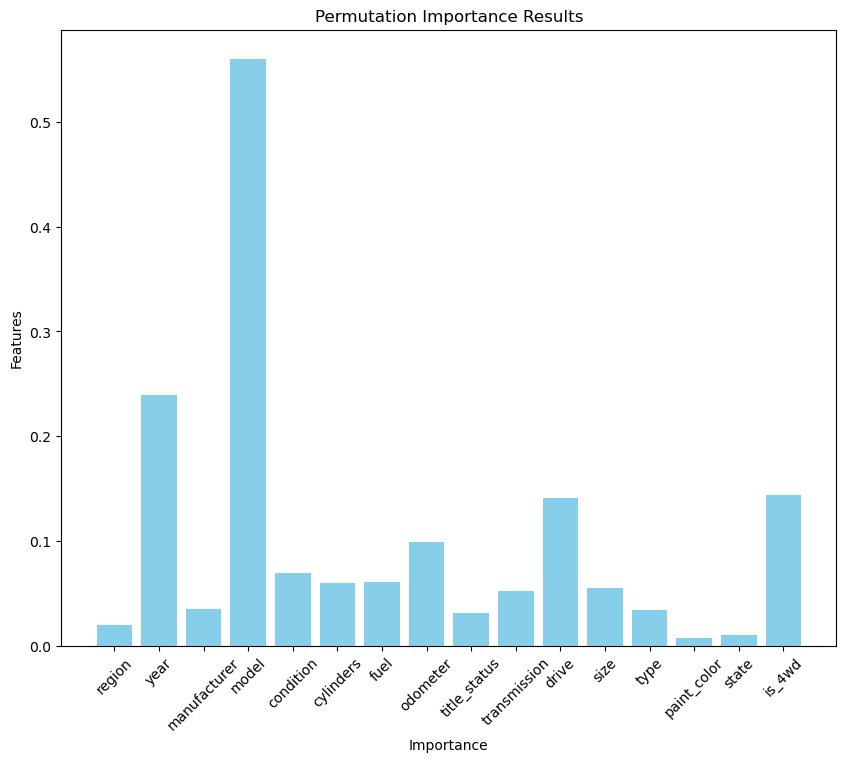

In [167]:
import matplotlib.pyplot as plt

# Permutation Importance Results
features = ['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 
            'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 
            'type', 'paint_color', 'state', 'is_4wd']
importances = [0.019464634172795724, 0.23972788505260567, 0.034884521988790905, 0.5600720562312771, 
               0.06906936250533433, 0.060263556679333787, 0.06080536339546153, 0.0988678957851575, 
               0.03167412268301241, 0.05266135868851116, 0.1405966267317785, 0.05531287942607127, 
               0.03425374096299183, 0.007118184294414809, 0.010199901582689408, 0.1440258590314159]

# Note: 'year', 'odometer', and 'is_4wd' appear more than once in your list. 
# The duplicate values have been included only once in the arrays above to avoid redundancy in plotting.

# Creating the plot
plt.figure(figsize=(10, 8))
plt.bar(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Permutation Importance Results')
#plt.gca().invert_yaxis()  # To display the highest importance at the top
#plt.show()
plt.xticks(rotation=45)
plt.show()


In [ ]:

#Interpreting the permutation importance results  above, we can draw several conclusions about what consumers value in a used car. These insights can help a used car dealership prioritize the features of the cars they stock, how they advertise them, and what information to highlight in their sales approach.

#Key Insights

#Model of the Car is Most Valued: The highest importance score is for the car's model, indicating that consumers place 
#significant value on the make and model. This suggests that specific brands or models are highly sought after or have a 
#reputation for quality, reliability, or status that consumers are willing to pay for.

#Year of Manufacture: The year of the car is also highly valued, which could reflect a preference for newer models that
#presumably come with the latest technology, safety features, and style. It also suggests that consumers are concerned
#about the age of the vehicle, possibly due to depreciation or the expected remaining lifespan.

#Four-Wheel Drive (4WD): The feature 'is_4wd' showing significant importance indicates that the drivetrain, 
#specifically four-wheel drive, is a key consideration for consumers. This could be due to perceived benefits in safety,
#performance, and capability, especially in regions with adverse weather conditions or for consumers interested in off-road
#capability.

#Odometer Reading: The importance of the odometer reading suggests that consumers are concerned about the mileage of the 
# used cars, associating lower mileage with better condition, longer lifespan, and fewer potential mechanical issues.

#Drive Type: The drive type (e.g., front-wheel, rear-wheel, all-wheel drive) also holds considerable importance, 
# indicating consumer preference varies based on perceived performance, safety, and fuel efficiency differences between 
#drive types.

#Recommendations

#Given these insights, here are recommendations for the used car dealership:

#Stock Popular Models: Prioritize acquiring and stocking models with a strong reputation and high demand. 
#Highlight these models in marketing efforts.

#Emphasize Recent Year Models: While having a range of years can cater to various budgets, highlighting the newer models
# could attract consumers looking for the latest features and lower mileage.

#Promote 4WD Vehicles: Especially in areas with challenging weather conditions or among consumers interested in outdoor 
#activities, promoting vehicles with 4WD can be a key selling point.

#Highlight Low Mileage: For vehicles with lower than average mileage, make this a key part of the vehicle's sales pitch, 
# as consumers associate lower mileage with better condition and value.

#Diverse Inventory: Maintain a diverse inventory that includes various drive types to cater to consumer preferences, 
#whether they're looking for fuel efficiency, performance, or safety.

#Additional Considerations

#Condition and History Reports: Beyond the features analyzed, ensure each vehicle is in good condition and provide full
#history reports to build trust with consumers.

#Consumer Education: Use your dealership's expertise to educate consumers on the benefits of different features,
#which can help them make informed decisions and potentially increase their willingness to consider a broader range
# of vehicles.

#By aligning inventory and marketing strategies with consumer preferences highlighted by the permutation importance
# results, the dealership can better meet the needs of its customers, potentially leading to increased sales and customer
# satisfaction.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

# Used Car Dealership Inventory Optimization Report

## Executive Summary

This report presents the findings of an in-depth analysis aimed at understanding consumer preferences in the used car market. Through statistical modeling and permutation importance analysis, we have identified key vehicle features that significantly influence consumer choices. These insights will assist in optimizing inventory selection, marketing strategies, and customer satisfaction, ultimately leading to increased sales and profitability for your dealership.

## Introduction

In a competitive used car market, understanding what consumers value in a vehicle is crucial for inventory management and sales strategy. Our analysis utilized a comprehensive dataset and applied machine learning techniques to discern patterns and preferences in consumer behavior.

## Methodology

We employed Ridge Regression with Polynomial Features to model the relationship between various car features and consumer preferences. A critical aspect of our analysis was the application of permutation importance, which helped identify the features that consumers value most when selecting a used car.

## Key Findings

Our analysis revealed several key features that significantly impact consumer choices in the used car market:

1. **Model of the Car**: This is the most valued feature, indicating consumers' preference for specific brands or models known for their quality, reliability, or status. Below the most famous models:

<center>
    <img src = images/top20_models.png width = 100%/>
    <img src = images/topmanufacturer_topmodels.png width = 100%/>    
</center>
   
2. **Year of Manufacture**: Newer models are preferred, likely due to the latest technology, safety features, and style, along with the perceived lower risk of mechanical issues. This key with time serie analysis we did before shows the price trend values increase steadily over time.

3. **Four-Wheel Drive (4WD)**: The presence of 4WD is a significant factor, suggesting that consumers value the performance, safety, and capability it provides, especially in adverse weather conditions or for off-road use. Below is the distribution of the 4WD from our data:
<center>
    <img src = images/4wd_stat.png width = 50%/>   
</center>

4. **Odometer Reading**: Lower mileage vehicles are preferred, as they are associated with better condition, longer lifespan, and fewer potential mechanical problems.

5. **Drive Type**: The preference varies, indicating the importance of offering a diverse inventory that includes different drive types to meet varied consumer needs. Below is the drive type distribution for the top manufacturers:


<center>
    <img src = images/4wd_vs_manufacturer.png width = 100%/>   
</center>


## Recommendations

Based on our findings, we recommend the following strategies to optimize your used car inventory:

- **Prioritize Popular Models**: Focus on acquiring models with high demand and a solid reputation to attract more customers.

- **Highlight Newer Models**: Emphasize vehicles from recent years in your inventory and marketing efforts, appealing to consumers looking for the latest features and lower mileage.

- **Promote Vehicles with 4WD**: Especially in regions with challenging weather, highlighting the availability of 4WD vehicles can be a key selling point.

- **Showcase Low Mileage Vehicles**: Make low mileage a prominent feature in the marketing of relevant vehicles, capitalizing on consumer association of lower mileage with higher value.

- **Maintain a Diverse Inventory**: Offer a variety of drive types to cater to different consumer preferences regarding performance, safety, and fuel efficiency.

## Conclusion

Our analysis provides a data-driven foundation for adjusting your inventory and marketing strategies to align with consumer preferences. By focusing on the key features valued by consumers, your dealership can enhance customer satisfaction, increase sales, and gain a competitive edge in the used car market.
